# 筛选没有问题的家庭

In [1]:
# 数据读取
import pandas as pd

pd.set_option('display.max_columns', None)
family2014 = pd.read_csv('数据/居民出行数据/2014/family_2014.csv',dtype=str)
travel2014 = pd.read_csv('数据/居民出行数据/2014/midtable_2014.csv',dtype=str)
familymember_2014 = pd.read_csv('数据/居民出行数据/2014/family_member_2014.csv',dtype=str)
family2023 = pd.read_csv('数据/居民出行数据/2023/family_total_33169.csv',dtype=str)
travel2023 = pd.read_csv('数据/居民出行数据/2023/midtable_total_33169.csv',dtype=str)
familymember_2023 = pd.read_csv('数据/居民出行数据/2023/familymember_total_33169.csv',dtype=str)
family_cluster = pd.read_csv('数据/family_cluster_improved.csv',dtype=str)
cluster_profile = pd.read_csv('数据/cluster_profile_improved.csv',dtype=str)
cluster_profile.columns
cluster_profile.iloc[:,1:] = cluster_profile.iloc[:,1:].astype(float)
## 家庭变量筛选
valid_member_number = familymember_2023.groupby('家庭编号').size().rename('家庭成员数量_real').reset_index()
family2023 = pd.merge(family2023, valid_member_number, on='家庭编号', how='left')
family2023 = family2023[family2023['家庭成员数量'].astype(int) == family2023['家庭成员数量_real']]
valid_family = family2023[['家庭编号']]
familymember_2023 = pd.merge(familymember_2023, valid_family, on='家庭编号', how='inner')
family2023[['家庭成员数量']].value_counts()
## 家庭连续型变量
family2023[['家庭成员数量','家庭工作人口数','机动车数量','脚踏自行车数量','电动自行车数量','摩托车数量','老年代步车数量']]
have_student_family = familymember_2023[familymember_2023['职业'] == '14'].drop_duplicates(['家庭编号'])[['家庭编号']]
have_student_family['have_student'] = 1
family2023 = pd.merge(family2023, have_student_family, on='家庭编号', how='left').fillna({'have_student':0})
## 家庭离散型变量
family2023[['have_student','家庭年收入']]
family2023['家庭年收入'].isna().sum()
## 个人变量筛选
familymember_2023['age'] = 2023 - familymember_2023['出生年份'].astype(int)
familymember_2023['age_group'] = pd.cut(familymember_2023['age'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], right=False, labels=['0-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','71-75','76-80','81-85','86-90','91-95','96-100'])
familymember_2023['age'].max() , familymember_2023['age'].min()
# familymember_2023['age'] = (familymember_2023['age'] - familymember_2023['age'].min()) / (familymember_2023['age'].max() - familymember_2023['age'].min())
## 连续型变量
familymember_2023[['age']]
(familymember_2023[familymember_2023['关系']=='0']['age']).describe()
familymember_2023.loc[familymember_2023['最高学历'].isna(),'最高学历'] = familymember_2023.loc[familymember_2023['最高学历'].isna(),'教育阶段']
## 离散型变量,这里的关系有点不太对，有的户主很小
familymember_2023[['性别','是否有驾照','关系','最高学历','职业']]
familymember_2023['是否有驾照'] = familymember_2023['是否有驾照'].fillna('0')

In [2]:
import numpy as np
## 变量编码
income_map = {'A':1, 'B':1, 'C':2, 'D':2, 'E':3, 'F':3, 'G':4, 'I':5, 'J':5, 'K':5}
family2023['家庭年收入'] = family2023['家庭年收入'].map(income_map)
familymember_2023['age_group'] = pd.cut(
    familymember_2023['age'], 
    bins=range(0, familymember_2023['age'].max() + 6, 5),
    labels=False 
)


familymember_2023['age_group'] = familymember_2023['age_group'].fillna(0)
familymember_2023['age'] = familymember_2023['age_group']
# relation_map = {'0':0, '17':1, '1':2, '2':2, '5':2, '6':2, '13':3, '14':3, '15':3, '16':3, '9':3, '10':3, '7':4, '8':4, '11':5, '12':5}
# education_map = {'1':1, '2':1, '3':2, '4':2, '5':3, '6':4, '7':5, '8':6, '9':7}
# occupation_map = {'1':1, '2':1, '3':1, '4':2, '5':2, '6':3, '7':2, '8':3, '9':1, '10':4, '11':4, '12':4, '13':5, '14':6, '15':7, '16':8, '17':8, '18':1, '19':1, '20':8}

# familymember_2023['关系'] = familymember_2023['关系'].map(relation_map)
# familymember_2023['最高学历'] = familymember_2023['最高学历'].map(education_map)
# familymember_2023['职业'] = familymember_2023['职业'].map(occupation_map)
familymember_2023['关系'].value_counts().shape, familymember_2023['最高学历'].value_counts().shape, familymember_2023['职业'].value_counts().shape



((16,), (9,), (20,))

In [3]:
family2023

,编号,家庭编号,所属城区,所属街道,所属社区,添加地址,家庭具体地址,小区编号,小区编号的环路代码,家庭流动人口数,家庭工作人口数,家庭学生人口数,家庭无业人口数,地址经度,地址纬度,调查员编号,调查员姓名,第1次入户时间,第1次敲门状态,第2次入户时间,第2次敲门状态,出行日期,家庭成员数量,住房类型,住房类型其他,住房类型_final,建筑面积,在北京是否更换过居住地址,本户居住起始年份,上一居住地址,上一居住地址经度,上一居住地址纬度,上一居住小区编码,家庭年收入,取快递次数,取外卖次数,脚踏自行车数量,电动自行车数量,摩托车数量,老年代步车数量,机动车数量,状态,成员信息登记状态,成员信息创建时间,成员信息更新时间,车辆信息登记状态,车辆信息创建时间,车辆信息更新时间,住房信息登记状态,住房信息创建时间,住房信息更新时间,出行信息登记状态,行程信息创建时间,出行信息更新时间,调查时的所在位置经度,调查时的所在位置纬度,调查时的所在位置定位时间,创建时间,修改时间,年度,项目名称,type,no.na,家庭成员数量_real,have_student
0,000b2a2b-1333-4d28-8056-8ab1a30870ad,010703000170,2,月坛街道,月坛社区,月坛西街东里21号院16,月坛西街东里21号院1号楼905,010703,3,0,2,0,0,116.349759,39.916528,e4decdee-2b98-4231-b1be-80537da8f151,郭建立,2023/5/15 0:00:00,success,2023/5/18 0:00:00,success,2023/5/16 0:00:00,3,1,-1,1,43.5,0,-1,-1,0,0,-1,3,0,0,3,0,0,0,1,success,saved,2023/5/27 13:25:45,2023/5/27 13:25:44,saved,2023/5/10 10:30:07,2023/6/5 8:49:48,saved,-1,2023/5/27 13:28:51,saved,-1,2023/6/5 8:50:03,NaN,NaN,NaN,2023/5/10 10:30:07,2023/6/8 10:48:55,2023,第六次北京城市交通综合调查（交研都市）,jy,3,3,0.0
1,003d14b7-e5fb-4b53-b10d-ebb4342af81b,040603000173,2,广安门外街道,鸭子桥社区,运达小区004,运达小区18-6-201,040501,3,0,2,0,0,116.345741,39.877241,2b4ad7c1-b331-484b-b6f3-3ba60e5c012e,孙丽群,2023/5/20 0:00:00,success,2023/5/22 0:00:00,success,2023/5/21 0:00:00,2,1,-1,1,70,0,-1,-1,0,0,-1,2,2,0,1,0,0,0,1,success,saved,2023/5/22 12:35:02,2023/5/22 12:36:29,saved,2023/5/20 8:56:11,2023/5/22 12:37:32,saved,-1,2023/5/22 12:37:51,saved,-1,2023/5/22 12:42:31,116.345699,39.877231,2023/5/22 15:12:50,2023/5/20 8:56:11,2023/6/4 22:13:44,2023,第六次北京城市交通综合调查（交研都市）,jy,0,2,0.0
2,00469d0e-2b5f-476f-bf86-ee554e9e3752,010305000086,2,展览路街道,新华里社区,新华里16号院10号楼020,新华里16号院10-2-702,010512,3,0,2,0,0,116.352423,39.935196,0d9d0be5-91d5-42b4-97ed-696f02298e48,王莹,2023/5/23 0:00:00,success,2023/5/25 0:00:00,success,2023/5/24 0:00:00,2,1,-1,1,127,0,-1,-1,0,0,-1,2,2,0,0,1,0,0,1,passed,saved,2023/5/25 9:53:24,2023/5/25 9:53:23,saved,2023/5/22 15:25:46,2023/5/25 9:55:30,saved,-1,2023/5/25 9:55:49,saved,-1,2023/5/25 10:02:23,116.352662,39.935372,2023/5/25 9:18:36,2023/5/22 15:25:46,2023/6/13 11:27:27,2023,第六次北京城市交通综合调查（交研都市）,jy,0,2,0.0
3,004aadb2-8693-438e-b358-56e75ade505e,040505000015,2,广安门外街道,红莲南里社区居委会,常青藤嘉园15,西城区常青藤嘉园2号院3-1106,040506,3,0,2,1,0,116.333144,39.880115,851e42f9-61cd-4ca8-9f28-5ae0544d4b97,李满慧,2023/4/19 0:00:00,success,2023/4/21 0:00:00,success,2023/4/20 0:00:00,3,1,-1,1,70,0,-1,-1,0,0,-1,4,1,0,1,1,0,0,1,success,saved,2023/4/23 18:23:57,2023/4/23 18:23:57,saved,2023/4/17 15:15:24,2023/4/24 22:30:47,saved,-1,2023/4/23 18:24:57,saved,-1,2023/4/25 15:50:29,NaN,NaN,NaN,2023/4/17 15:15:24,2023/5/9 10:37:51,2023,第六次北京城市交通综合调查（交研都市）,jy,3,3,1.0
4,004c99c2-2690-461d-8463-d1850d911656,120201000011,11,庞各庄镇,东中堡村村委会,东中堡村19,东中堡村东街北三条4号,120203,7,0,2,0,0,116.324315,39.644375,d9554d3c-a98a-4f36-afa7-f9565c2d1d76,崔玉晶,2023/6/6 0:00:00,success,2023/6/8 0:00:00,success,2023/6/7 0:00:00,2,6,-1,6,200,0,-1,-1,0,0,-1,1,0,0,1,2,0,0,1,success,saved,2023/6/6 11:30:46,2023/6/6 11:30:46,saved,2023/6/4 23:14:28,2023/6/6 11:32:13,saved,-1,2023/6/6 11:32:35,saved,-1,2023/6/29 11:25:59,116.324315,39.644375,2023/6/6 11:28:16,2023/6/4 23:14:28,2023/6/29 11:26:10,2023,第六次北京城市交通综合调查（交研都市）,jy,0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33161,fff6ec7b-8fa8-453c-b557-2f4c3f6eb05b,132021000002,7,长阳镇,加州水郡东区社区,01,64号楼1单元802,132021,6,0,0,0,0,116.167937,39.767044,6464bd57-78b5-c674-0013-007c01cd8e3e,左金风,2023/5/19 0:00:00,success,2023/5/23 0:00:00,success,2023/5/22 0:00:00,1,1,-1,1,110,0,-1,-1,0,0,-1,1,0,0,1,0,0,0,0,success,saved,2023/5/20 20:13:46,2023/5/23 15:18:21,saved,2023/5/19 10:21:45,2023/5/23 15:18:34,saved,-1,2023/5/23 15:18:50,saved,-1,2023/5/23 20:11:10,116.168532,39.767891,2023/5/19 11:30:13,2023/5/19 10:21:45,2023/5/23 20:11:17,2023,第六次北京城市交通综合调查（民生智库）,ms,0,1,0.0
33162,fffa6aad-791f-420d-b0dc-

# 活动链提取

In [4]:
travelinfo = pd.read_csv('数据/居民出行数据/2023/midtable_total_33169.csv',dtype=str)

In [5]:
travelinfo = pd.merge(travelinfo, family2023[['家庭编号']])

In [6]:
## 活动链太大的去除掉
travel_num_the = travelinfo.groupby(['家庭编号','家庭成员编号']).size().rename('出行次数').reset_index()
more_travel = travel_num_the[travel_num_the['出行次数']>6][['家庭编号']].drop_duplicates()

In [7]:
family2023 = family2023[-family2023['家庭编号'].isin(more_travel['家庭编号'])]

In [8]:
travelinfo = pd.merge(travelinfo, family2023[['家庭编号']])
familymember_2023 = pd.merge(familymember_2023, family2023[['家庭编号']])

In [9]:
## 没有出行的家庭

In [10]:
have_travel_family = travelinfo[['家庭编号']].value_counts().reset_index()[['家庭编号']]

In [11]:
family2023 = family2023[family2023['家庭编号'].isin(have_travel_family['家庭编号'])]
travelinfo = pd.merge(travelinfo, family2023[['家庭编号']])
familymember_2023 = pd.merge(familymember_2023, family2023[['家庭编号']])

## 目的、方式、时间、车辆、陪同

In [12]:
activityinfo = travelinfo[['家庭编号','家庭成员编号','出行序号','出行目的','交通方式的编号','ModelMode','出发时间1小时时间段','到达时间1小时时间段','是驾驶员还是乘客','是否和家庭成员的联合出行']]

In [13]:
## 1:步行;2:自行车、电动自行车；3:公交、地铁；4:小汽车、出租车；5:其他
## 1:步行、自行车、电动自行车；2:公交、地铁；3:小汽车、出租车；4:其他
## 1:步行；2:公交；3:地铁；4:自行车；5:电动自行车；6:小汽车；7:其他机动车；8:班车类； 9:出租 ;10:摩托车; 11:其他

class_map2023 = {
    "1": "1",
    "2.1": "6",
    "2.2": "7",
    "2.3": "7",
    "3": "7",
    "4": "7",
    "5": "10",
    "6": "3",
    "7": "2",
    "8": "9",
    "9": "9",
    "10": "8",
    "11": "8",
    "12": "8",
    "13": "4",
    "14": "4",
    "15": "4",
    "16": "5",
    "17": "11",
    "18": "11",
    "19": "11"
}


In [14]:
activityinfo['是驾驶员还是乘客'] = activityinfo['是驾驶员还是乘客'].fillna('0')

/tmp/ipykernel_1915957/200093675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activityinfo['是驾驶员还是乘客'] = activityinfo['是驾驶员还是乘客'].fillna('0')


In [15]:
activityinfo['ModelMode'] = activityinfo['交通方式的编号'].map(class_map2023)

/tmp/ipykernel_1915957/1644536957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activityinfo['ModelMode'] = activityinfo['交通方式的编号'].map(class_map2023)


In [16]:
#2023数据
# 1：工作
# 2：外出就餐
# 3：公务外出
# 4：上学/校外托管
# 5：探亲访友
# 7：休闲娱乐健身
# 8：个人事务
# 10：接送人
# 13：购物
# 14：其他
# 15：回另一居住地
# 21：下班回家
# 22：放学回家
# 23：个人事务回家
# 24：其他回家

# 1：在家（15,21,22,23,24）
# 2: 工作（1）
# 3：上学（4）
# 4：公务外出类（3）
# 5：外出吃饭
# 6：探亲访友
# 7：休闲娱乐
# 8：购物
# 9：接送人
# 10：其他（8，14）
def get_activity_type2023(r):
    if r in ['15','21','22','23','24']:
        return '1'
    elif r == '1':
        return '2'
    elif r == '4':
        return '3'
    elif r == '3':
        return '4'
    elif r == '2':
        return '5'
    elif r == '5':
        return '6'
    elif r == '7':
        return '7'
    elif r == '13':
        return '8'
    elif r in ['10']:
        return '9'
    elif r in ['8', '14']:
        return '10'

In [17]:
activityinfo['ActivityType'] = activityinfo['出行目的'].apply(get_activity_type2023)

/tmp/ipykernel_1915957/974261224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activityinfo['ActivityType'] = activityinfo['出行目的'].apply(get_activity_type2023)


## 空间阻抗矩阵、活动价值分布、活动主题向量矩阵的提取

### 空间阻抗

In [18]:
import geopandas as gpd
taz_data = gpd.read_file('数据/北京市交通小区/北京市交通小区.shp')


In [19]:
taz_data = taz_data.sort_values('zoneID')

In [20]:
import geopandas as gpd
import pandas as pd
from scipy.spatial.distance import cdist

# -----------------------------------------------------------
# 1. 坐标系检查与转换 (建议)
# -----------------------------------------------------------
# 如果数据的坐标系是经纬度 (如 EPSG:4326)，计算出的距离单位将是“度”。
# 为了得到以“米”为单位的距离，建议将其转换为投影坐标系。
# 北京地区常用的投影坐标系包括 EPSG:32650 (UTM zone 50N) 或 EPSG:4528 (CGCS2000 3-degree Gauss-Kruger zone 39)
# 下面代码示例尝试转换为 EPSG:32650，如果您的数据已经是投影坐标系，可跳过此步

# -----------------------------------------------------------
# 2. 提取 Polygon 中心点 (Centroid)
# -----------------------------------------------------------
centroids = taz_data.geometry.centroid

# 提取中心点的 x, y 坐标，构建坐标数组
coords = list(zip(centroids.x, centroids.y))

# -----------------------------------------------------------
# 3. 计算两两距离矩阵
# -----------------------------------------------------------
# 使用 cdist 计算欧氏距离，返回一个 N x N 的矩阵
distance_matrix = cdist(coords, coords, metric='euclidean')

# -----------------------------------------------------------
# 4. 整理结果
# -----------------------------------------------------------
# 将矩阵转换为 DataFrame，行和列索引使用 zoneID，方便查询
zone_ids = taz_data['zoneID'].values
dist_df = pd.DataFrame(distance_matrix, index=zone_ids, columns=zone_ids)

# 打印前5行5列查看结果
print("距离矩阵 (前5x5):")
print(dist_df.iloc[:5, :5])

# 如果需要保存结果
# dist_df.to_csv('taz_distance_matrix.csv')

距离矩阵 (前5x5):
             010101       010102       010103       010104       010105
010101     0.000000  1643.444091  2506.369833  1669.376973  1217.351509
010102  1643.444091     0.000000  1167.059753  1204.562799  1908.972286
010103  2506.369833  1167.059753     0.000000  1104.946134  2169.602222
010104  1669.376973  1204.562799  1104.946134     0.000000  1066.931600
010105  1217.351509  1908.972286  2169.602222  1066.931600     0.000000


### 活动主题模型

In [21]:
## 23年POI合并
import glob

# 获取所有 shp 文件的路径
poi_files2023 = glob.glob('数据/2023.05 高德/*.csv')
ls = []
for i in poi_files2023:
    tmp = pd.read_csv(i)
    ls.append(tmp)
poi_2023 = pd.concat(ls)

/tmp/ipykernel_1915957/145867498.py:8: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp = pd.read_csv(i)


In [22]:
poi_2023['geometry'] = gpd.points_from_xy(poi_2023['lon_wgs84'], poi_2023['lat_wgs84'])

In [23]:
poi_2023['大类'].value_counts()

大类
地名地址信息       193586
购物服务         150940
生活服务         112919
餐饮服务          95990
公司企业          80743
通行设施          78606
室内设施          75478
交通设施服务        60018
政府机构及社会团体     55202
科教文化服务        47253
商务住宅          36813
体育休闲服务        26269
医疗保健服务        23306
汽车服务          16227
住宿服务          15719
公共设施          15592
金融保险服务        13511
风景名胜           9525
汽车维修           3729
汽车销售           3135
摩托车服务          1115
道路附属设施          593
事件活动             28
Name: count, dtype: int64

In [ ]:
## 地名地址信息, 购物服务 通行设施 室内设施 交通设施服务 公共设施 道路附属设施

In [ ]:
poi_remove = ['地名地址信息', '购物服务', '通行设施', '室内设施', '交通设施服务', '公共设施','道路附属设施']

In [26]:
poi_2023 = gpd.GeoDataFrame(poi_2023, geometry='geometry', crs='EPSG:4326')

In [27]:
taz_data = taz_data.to_crs(epsg=4326)

In [28]:
poi_2023 = poi_2023.sjoin(taz_data[['zoneID','geometry']], how='left', predicate='within')

In [29]:
poi_2023_new = poi_2023[~poi_2023['大类'].isin(poi_remove)]

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
# 去掉未落入任何 zone 的 POI
poi_valid = poi_2023_new.dropna(subset=['zoneID'])

# zone × POI 类别 计数
zone_poi_count = (
    poi_valid
    .groupby(['zoneID', '大类'])
    .size()
    .reset_index(name='count')
)


In [31]:
# 将 POI 类别按频数展开为“词序列”
zone_docs = (
    zone_poi_count
    .loc[zone_poi_count.index.repeat(zone_poi_count['count'])]
    .groupby('zoneID')['大类']
    .apply(lambda x: ' '.join(x))
)




In [61]:
vectorizer = CountVectorizer(
    min_df=10,      # 至少出现在 5 个 zone 中
    max_df=0.7     # 去掉“到处都有”的功能
)

X = vectorizer.fit_transform(zone_docs)

In [62]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 12  # 城市尺度常用 8–15，可调

lda = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=50,
    learning_method='batch',
    random_state=42
)

lda.fit(X)


LatentDirichletAllocation(max_iter=50, n_components=12, random_state=42)

In [70]:
feature_names = vectorizer.get_feature_names_out()

def print_topics(model, feature_names, n_top_words=20):
    for i, topic in enumerate(model.components_):
        top_features = [
            feature_names[j]
            for j in topic.argsort()[:-n_top_words-1:-1]
        ]
        print(f"Topic {i}: {', '.join(top_features)}")

print_topics(lda, feature_names)


Topic 0: 道路附属设施, 汽车维修, 风景名胜, 汽车销售, 摩托车服务, 事件活动
Topic 1: 摩托车服务, 风景名胜, 汽车维修, 汽车销售, 道路附属设施, 事件活动
Topic 2: 事件活动, 风景名胜, 汽车销售, 道路附属设施, 摩托车服务, 汽车维修
Topic 3: 汽车维修, 风景名胜, 摩托车服务, 汽车销售, 道路附属设施, 事件活动
Topic 4: 风景名胜, 汽车维修, 汽车销售, 摩托车服务, 道路附属设施, 事件活动
Topic 5: 道路附属设施, 风景名胜, 汽车维修, 汽车销售, 摩托车服务, 事件活动
Topic 6: 风景名胜, 汽车维修, 摩托车服务, 汽车销售, 道路附属设施, 事件活动
Topic 7: 汽车维修, 汽车销售, 摩托车服务, 风景名胜, 道路附属设施, 事件活动
Topic 8: 汽车销售, 摩托车服务, 道路附属设施, 风景名胜, 汽车维修, 事件活动
Topic 9: 摩托车服务, 汽车维修, 风景名胜, 汽车销售, 道路附属设施, 事件活动
Topic 10: 汽车维修, 道路附属设施, 汽车销售, 摩托车服务, 风景名胜, 事件活动
Topic 11: 汽车销售, 汽车维修, 风景名胜, 摩托车服务, 道路附属设施, 事件活动


In [64]:
zone_topic_dist = lda.transform(X)

zone_topic_df = pd.DataFrame(
    zone_topic_dist,
    index=zone_docs.index,
    columns=[f'topic_{i}' for i in range(n_topics)]
)


In [66]:
zone_topic_df['topic'] = zone_topic_df.idxmax(axis=1)

In [73]:
taz_topic = (
    taz_data
    .merge(zone_topic_df, left_on='zoneID', right_index=True, how='left')
)

In [80]:
taz_topic = taz_topic.fillna(0)


In [86]:
taz_topic_array = taz_topic[[f'topic_{i}' for i in range(n_topics)]].values

In [50]:
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from tqdm import tqdm

# 文档分词
texts = [doc.split() for doc in zone_docs]

dictionary = Dictionary(texts)
dictionary.filter_extremes(
    no_below=10,    # 至少出现在 10 个 zone
    no_above=0.7,   # 出现在 >70% zone 的类别去掉
)
corpus = [dictionary.doc2bow(text) for text in texts]

valid_idx = [
    i for i, doc in enumerate(texts)
    if len(doc) >= 5
]

texts_f = [texts[i] for i in valid_idx]
corpus_f = [corpus[i] for i in valid_idx]

def compute_coherence(k):
    lda = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=k,
        random_state=42,
        passes=20
    )
    coherence_model = CoherenceModel(
        model=lda,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    return coherence_model.get_coherence()

ks = range(5, 21)
coherence_scores = [compute_coherence(k) for k in tqdm(ks)]


100%|██████████| 16/16 [02:54<00:00, 10.88s/it]


In [59]:
lda = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=20,
        random_state=42,
        passes=20
    )

In [51]:
coherence_scores

[0.34950009606164234,
 0.3495000960616424,
 0.3495000960616424,
 0.34950009606164245,
 0.34950009606164234,
 0.3495000960616424,
 0.3495000960616424,
 0.3495000960616424,
 0.3495000960616424,
 0.3495000960616423,
 0.3495000960616424,
 0.34950009606164245,
 0.34950009606164234,
 0.3495000960616424,
 0.34950009606164234,
 0.3495000960616423]

### 活动价值

In [107]:
### 房价的数据是否和出行的数据能够空间匹配-》房价的小区有点少，可以算出来后采用空间插值的方法
import geopandas as gpd
import pandas as pd
import datetime
pd.set_option('display.max_columns', None)
travel2023 = pd.read_csv('数据/居民出行数据/2023/midtable_total_33169.csv',dtype=str)
trip2023 = pd.read_csv('数据/居民出行数据/2023/trip_total_33169.csv',dtype=str)


trip2023.rename(columns={'成员编号':'家庭成员编号'},inplace=True)
travel2023 = pd.merge(travel2023,trip2023[trip2023['凌晨三点人员的位置'] == '1'][['家庭编号','家庭成员编号']])

initial_place2023 = pd.merge(travel2023,trip2023[trip2023['凌晨三点人员的位置'] == '1'][['家庭编号','家庭成员编号']]).drop_duplicates(subset=['家庭编号','家庭成员编号'])
initial_place2023['出行序号'] = '0'
initial_place2023['出行目的'] = '15'
initial_place2023['到达时间'] = initial_place2023['到达时间'].str.split(' ').str[0] + ' 03:00:00'
initial_place2023['到达地点小区号'] = initial_place2023['小区编号']

last_place2023 = initial_place2023.copy()
last_place2023['出行序号'] = '100'
last_place2023['出发时间'] = (pd.to_datetime(last_place2023['到达时间']) + datetime.timedelta(days=1)).astype(str)

#2023数据
# 1：工作
# 2：外出就餐
# 3：公务外出
# 4：上学/校外托管
# 5：探亲访友
# 7：休闲娱乐健身
# 8：个人事务
# 10：接送人
# 13：购物
# 14：其他
# 15：回另一居住地
# 21：下班回家
# 22：放学回家
# 23：个人事务回家
# 24：其他回家

# 1：在家（15,21,22,23,24）
# 2: 工作（1）
# 3：上学（4）
# 4：公务外出类（3）
# 5：生活娱乐（2,5,7,13）
# 6：个人事务类（8,10）
# 7：其他（14）
# 8:出行时间
def get_activity_type2023(r):
    if r in ['15','21','22','23','24']:
        return '1'
    elif r == '1':
        return '2'
    elif r == '4':
        return '3'
    elif r == '3':
        return '4'
    elif r in ['2','5','7','13']:
        return '5'
    elif r in ['8','10']:
        return '6'
    elif r == '14':
        return '7'
    
travel2023_activity = pd.concat([initial_place2023,travel2023, last_place2023],axis=0)
travel2023_activity['出行序号'] = travel2023_activity['出行序号'].astype(int)
travel2023_activity = travel2023_activity.sort_values(by=['家庭编号','家庭成员编号','出行序号'])
travel2023_activity['unique_id'] = travel2023_activity['家庭编号'] + '-' + travel2023_activity['家庭成员编号']
for i in travel2023_activity.columns:
    travel2023_activity[i+'1'] = travel2023_activity[i].shift(-1)

travel2023_activity = travel2023_activity[travel2023_activity['unique_id'] == travel2023_activity['unique_id1']]
travel2023_activity['activity_type'] = travel2023_activity['出行目的'].apply(get_activity_type2023)

travel2023_activity.loc[((travel2023_activity['出行目的']=='2') & 
                    (travel2023_activity['出行目的1'] == '1')),'activity_type'] = '7'

travel2023_activity['出发时间1'] = pd.to_datetime(travel2023_activity['出发时间1'],format='mixed')
travel2023_activity['到达时间'] = pd.to_datetime(travel2023_activity['到达时间'],format='mixed')
travel2023_activity['到达时间1'] = pd.to_datetime(travel2023_activity['到达时间1'],format='mixed')


travel2023_activity['duration'] = ((travel2023_activity['出发时间1'] - travel2023_activity['到达时间']).dt.total_seconds()/3600)
travel2023_activity['trip_duration'] = ((travel2023_activity['到达时间1'] - travel2023_activity['出发时间1']).dt.total_seconds()/3600)
## 房价
houseprice2023 = pd.read_csv('数据/房价数据/2023年北京小区房价数据（市区）.csv',encoding= 'gbk', dtype=str)
import geopandas as gpd
taz_data = gpd.read_file('数据/北京市交通小区/北京市交通小区.shp')

taz_data = taz_data[['zoneID','geometry']]
houseprice2023['geometry'] = gpd.points_from_xy(houseprice2023['lng84'].astype(float),houseprice2023['lat84'].astype(float))
# 创建中心城区判断字典
is_center_district = {
    '东城': 1,
    '西城': 1,
    '朝阳': 1,
    '海淀': 1,
    '丰台': 1,
    '石景山': 1,
    '通州': 0,
    '昌平': 0,
    '大兴': 0,
    '房山': 0,
    '顺义': 0,
    '密云': 0,
    '怀柔': 0,
    '门头沟': 0,
    '延庆': 0,
    '平谷': 0
}

# 将区县转换为0-1变量
houseprice2023['central'] = houseprice2023['区县'].map(is_center_district)

houseprice2023 = gpd.GeoDataFrame(houseprice2023,geometry='geometry')
## 地铁站数据

metro_station2023 = gpd.read_file('数据/地铁网络/地铁2023.05/北京_站点.shp')
import transbigdata as tbd

houseprice2023 = tbd.ckdnearest(houseprice2023, metro_station2023[['StationNam','X', 'Y']], Aname=['lng84', 'lat84'], Bname=['X', 'Y'])
taz_data = taz_data.to_crs('epsg:4326')

taz_houseprice_2023 = taz_data.sjoin(houseprice2023,op='contains')
taz_houseprice_2023['价格'] = taz_houseprice_2023['价格'].astype(float)
taz_houseprice_2023['容积率'] = taz_houseprice_2023['容积率'].astype(float)

# 首先将'得分'列转换为数值类型，错误值会变成NaN
taz_houseprice_2023['得分'] = pd.to_numeric(taz_houseprice_2023['得分'], errors='coerce')

# 计算每个zoneID的得分平均值
zone_avg_scores = taz_houseprice_2023.groupby('zoneID')['得分'].transform('mean')

# 将NaN值替换为对应zoneID的平均得分
taz_houseprice_2023['得分'] = taz_houseprice_2023['得分'].fillna(zone_avg_scores)

# 如果某个zoneID的所有值都是NaN，则其平均值也会是NaN，可以再次处理这些情况
# 比如用总体平均分替换
if taz_houseprice_2023['得分'].isna().any():
    overall_avg = taz_houseprice_2023['得分'].mean()
    taz_houseprice_2023['得分'] = taz_houseprice_2023['得分'].fillna(overall_avg)


# 首先将'建筑年份'列转换为数值类型，错误值会变成NaN
taz_houseprice_2023['year'] = pd.to_numeric(taz_houseprice_2023['建筑年份'], errors='coerce')

# 计算每个zoneID的建筑年份平均值
zone_avg_scores = taz_houseprice_2023.groupby('zoneID')['year'].transform('mean')

# 将NaN值替换为对应zoneID的平均建筑年份
taz_houseprice_2023['year'] = taz_houseprice_2023['year'].fillna(zone_avg_scores)

# 如果某个zoneID的所有值都是NaN，则其平均值也会是NaN，可以再次处理这些情况
# 比如用总体平均分替换
if taz_houseprice_2023['year'].isna().any():
    overall_avg = taz_houseprice_2023['year'].mean()
    taz_houseprice_2023['year'] = taz_houseprice_2023['year'].fillna(overall_avg)

taz_houseprice_2023['age'] = 2023 - taz_houseprice_2023['year'].astype(int)


taz_houseprice_2023 = taz_houseprice_2023[taz_houseprice_2023['价格']>0]
taz_meanhouseprice_2023 = taz_houseprice_2023.groupby('zoneID')[['价格','得分','central','容积率','dist','age']].mean().reset_index().rename(columns={'价格':'house_price','得分':'score','容积率':'plot'})
taz_meanhouseprice_2023.rename(columns={'zoneID':'taz_code'},inplace=True)


## 23年POI合并
import glob

# 获取所有 shp 文件的路径
poi_files2023 = glob.glob('数据/2023.05 高德/*.csv')
ls = []
for i in poi_files2023:
    tmp = pd.read_csv(i)
    ls.append(tmp)
poi_2023 = pd.concat(ls)
poi_2023['geometry'] = gpd.points_from_xy(poi_2023['lon_wgs84'].astype(float),poi_2023['lat_wgs84'].astype(float))
poi_2023 = gpd.GeoDataFrame(poi_2023,geometry='geometry')
poi_2023.crs = 'epsg:4326'
poi_zone_2023 = gpd.sjoin(taz_data,poi_2023,op='contains')
## 2023中需要单独拎出来的
## 购物服务对应生活娱乐中的购物
## 餐饮服务对应生活娱乐中的吃饭
## 公司企业对应工作和公务外出
## 中类中的学校对应上学
## 体育休闲服务+中类中的公园广场对应生活娱乐中的休闲娱乐健身
poi_zone_2023['shopping'] = (poi_zone_2023['大类'] == '购物服务').astype(int)
poi_zone_2023['restaurant'] = (poi_zone_2023['大类'] == '餐饮服务').astype(int)
poi_zone_2023['company'] = (poi_zone_2023['大类'] == '公司企业').astype(int)
poi_zone_2023['school'] = (poi_zone_2023['中类'] == '学校').astype(int)
poi_zone_2023['recreation'] = (poi_zone_2023['大类'] == '体育休闲服务').astype(int) | (poi_zone_2023['中类'] == '公园广场').astype(int)
## 可达性计算
# 定义一个函数来计算特定POI类型的可达性并合并到结果数据框
def calculate_poi_accessibility_2023(poi_type):
    # 筛选特定类型的POI
    filtered_pois = poi_zone_2023[poi_zone_2023[poi_type] == 1]
    
    # 计算到最近POI的距离
    dist_column_name = f'dist_to_{poi_type}'
    avg_dist_column_name = f'avg_dist_to_{poi_type}'
    
    # 使用tbd的ckdnearest函数计算最近邻距离
    dist_result = tbd.ckdnearest(taz_houseprice_2023, filtered_pois, 
                                 Aname=['lng84', 'lat84'], Bname=['lon_wgs84', 'lat_wgs84'])
    
    # 将距离列合并到原始数据中
    taz_houseprice_2023[dist_column_name] = dist_result['dist']
    
    # 按照zoneID分组计算平均距离
    dist_by_zone = taz_houseprice_2023.groupby('zoneID')[dist_column_name].mean().reset_index()
    dist_by_zone.rename(columns={dist_column_name: avg_dist_column_name}, inplace=True)
    
    # 将计算结果与taz_meanhouseprice_2023合并
    result = taz_meanhouseprice_2023.merge(
        dist_by_zone,
        left_on='taz_code',
        right_on='zoneID',
        how='left'
    )
    
    # 删除多余的zoneID列
    if 'zoneID' in result.columns:
        result.drop('zoneID', axis=1, inplace=True)
    
    return result

# 依次计算五种POI类型的可达性
poi_types = ['shopping', 'restaurant', 'company', 'school', 'recreation']

# 循环计算每种POI类型的可达性
for poi_type in poi_types:
    taz_meanhouseprice_2023 = calculate_poi_accessibility_2023(poi_type)

taz_poi_2023 = poi_zone_2023.groupby('zoneID')[['shopping','restaurant','company','school','recreation']].sum().reset_index().rename(columns={'zoneID':'taz_code'})
taz_hedonic_2023 = pd.merge(taz_meanhouseprice_2023,taz_poi_2023)
beijing = gpd.GeoDataFrame.from_file(r'/mnt/d/OneDrive/Desktop//地图图片//北京行政区划//北京行政区划.shp',encoding = 'utf-8')
beijing = beijing.drop(index=14)
taz_data_point = taz_data.copy()
taz_data_point['geometry'] = taz_data_point['geometry'].centroid
taz_data_point = taz_data_point.to_crs('epsg:4326')

taz_data_point = taz_data_point.sjoin(beijing[['geometry','name']],op='intersects')
taz_data_point['name'] = taz_data_point['name'].str.replace(' District$', '', regex=True)
taz_data_point['name'] = taz_data_point['name'].str.replace(' County$', '', regex=True)
taz_data_point = pd.concat([taz_data_point,pd.get_dummies(taz_data_point['name'])],axis=1)

taz_hedonic_2023 = pd.merge(taz_hedonic_2023,taz_data_point[['zoneID','Changping','Daxing','Fangshan','Huairou','Mentougou', 'Miyun', 'Pinggu','Shunyi','Tongzhou','Yanqing','Fengtai','Shijingshan']],left_on='taz_code',right_on='zoneID',how='left')

/tmp/ipykernel_1915957/4220761081.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  travel2023_activity[i+'1'] = travel2023_activity[i].shift(-1)
/tmp/ipykernel_1915957/4220761081.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  travel2023_activity[i+'1'] = travel2023_activity[i].shift(-1)
/tmp/ipykernel_1915957/4220761081.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

In [112]:
## 容积率不行 两个检验都过不去
taz_data.rename(columns={'zoneID':'taz_code'},inplace=True)
taz_data = taz_data.to_crs('epsg:2416')
taz_hedonic_2023 = pd.merge(taz_data[['taz_code','geometry']],taz_hedonic_2023)
## 房价取对数
import math
taz_hedonic_2023['house_price'] = taz_hedonic_2023['house_price'].apply(lambda x: math.log(x) if x > 0 else 0)

from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
x = taz_hedonic_2023[['dist', 'age',
                      'Changping', 'Daxing', 'Fangshan', 'Huairou', 'Mentougou', 'Miyun','Pinggu', 'Shunyi', 'Tongzhou', 'Yanqing', 'Fengtai', 'Shijingshan',
                      'avg_dist_to_shopping', 'avg_dist_to_restaurant','avg_dist_to_company', 'avg_dist_to_school', 'avg_dist_to_recreation',
                      'shopping','restaurant','company','school','recreation']].astype(float)
x[['shopping','restaurant','company','school','recreation']] = x[['shopping','restaurant','company','school','recreation']].div(taz_hedonic_2023.area.values[:, np.newaxis], axis=0) * 1000000
vif = [variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
vif

from esda.moran import Moran
import libpysal
##要是负的话 估计出来也是负的
# import numpy as np
# import statsmodels.api as sm

# g_y = np.exp(taz_hedonic_2023['house_price'].values.reshape(-1,1))
# # 自变量;由于work估计不准确，因此更倾向于用工作人口密度来描述
# g_X = taz_hedonic_2023[['dist','age',
#                       'Changping', 'Daxing', 'Fangshan', 'Huairou', 'Mentougou', 'Miyun','Pinggu', 'Shunyi', 'Tongzhou', 'Yanqing', 'Fengtai', 'Shijingshan',
#                       'avg_dist_to_shopping', 'avg_dist_to_restaurant','avg_dist_to_company', 'avg_dist_to_school', 'avg_dist_to_recreation',
#                       'shopping','restaurant','company','school','recreation']].values


# x = sm.add_constant(g_X) # 若模型中有截距，必须有这一步
# model = sm.OLS(g_y, x).fit() # 构建最小二乘模型并拟合
# result = pd.DataFrame(model.params,columns = ['params'])
# result['t'] = model.tvalues
# result['r2'] = model.rsquared


wq = libpysal.weights.Queen.from_dataframe(taz_hedonic_2023)

ls = []
for i in ['dist','age',
                      'Changping', 'Daxing', 'Fangshan', 'Huairou', 'Mentougou', 'Miyun','Pinggu', 'Shunyi', 'Tongzhou', 'Yanqing', 'Fengtai', 'Shijingshan',
                      'avg_dist_to_shopping', 'avg_dist_to_restaurant','avg_dist_to_company', 'avg_dist_to_school', 'avg_dist_to_recreation',
                      'shopping','restaurant','company','school','recreation']:
    weight = taz_hedonic_2023[i]
    if i in ['shopping','restaurant','company','school','recreation']:
        weight = weight / taz_hedonic_2023.area.values * 1000000
    #应用方法
    lisa_moran = Moran(weight,wq)
    #得到结果
    ls.append([lisa_moran.I,lisa_moran.z_norm,lisa_moran.p_norm])
pd.DataFrame(ls,columns=['moran','z','p'])
### 模型估计
from mgtwr.model import GTWR,GWR
from mgtwr.sel import SearchGTWRParameter,SearchGWRParameter


taz_hedonic_2023['area'] = taz_hedonic_2023['geometry'].area

/tmp/ipykernel_1915957/3239658945.py:40: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq = libpysal.weights.Queen.from_dataframe(taz_hedonic_2023)


In [113]:

taz_hedonic_2023['lon'] = taz_hedonic_2023['geometry'].centroid.x
taz_hedonic_2023['lat'] = taz_hedonic_2023['geometry'].centroid.y

In [121]:
g_y = (taz_hedonic_2023['house_price'].values.reshape(-1,1))
# 自变量;由于work估计不准确，因此更倾向于用工作人口密度来描述
g_X = taz_hedonic_2023[['dist','age',
                      'Changping', 'Daxing', 'Fangshan', 'Huairou', 'Mentougou', 'Miyun','Pinggu', 'Shunyi', 'Tongzhou', 'Yanqing', 'Fengtai', 'Shijingshan',
                      'avg_dist_to_shopping', 'avg_dist_to_restaurant','avg_dist_to_company', 'avg_dist_to_school', 'avg_dist_to_recreation',
                      'shopping','restaurant','company','school','recreation']].values

g_X[:,19:] = g_X[:,19:] / taz_hedonic_2023['area'].values.reshape(-1,1) * 1000000
# 坐标信息Latitude	Longitud
u = taz_hedonic_2023['lon']
v = taz_hedonic_2023['lat']
g_coords = taz_hedonic_2023[['lon','lat']].values
# g_coords = g_coords - g_coords.min(axis=0)
g_X = g_X.astype(float)
a = SearchGWRParameter(coords=g_coords, y=g_y, X=g_X, kernel = 'exponential', fixed = False,convert=True)
bw = a.search()
gwr_2023 = GWR(coords=g_coords, y=g_y, X=g_X, bw=bw, kernel='exponential', fixed=False,constant=True,convert=True).fit()


bw: 1052.0 , score: 2104.97
bw: 1279.0 , score: 2103.47
bw: 1419.0 , score: 2102.18
bw: 1506.0 , score: 2101.6
bw: 1559.0 , score: 2101.32
bw: 1593.0 , score: 2101.27
bw: 1613.0 , score: 2101.26
bw: 1626.0 , score: 2101.26
bw: 1633.0 , score: 2101.26
bw: 1638.0 , score: 2101.26
bw: 1641.0 , score: 2101.26
bw: 1643.0 , score: 2101.26
bw: 1643.0 , score: 2101.26
bw: 1643.0 , score: 2101.26
bw: 1643.0 , score: 2101.26


In [122]:
gwr_2023.R2

0.6355049783907301

In [123]:
gwr_2023.aic

2099.671647018935

In [124]:
gwr_2023.tvalues.mean(axis = 0)

array([202.2972492 , -12.27466115,  -1.27470667, -14.95367027,
       -14.79443283, -21.1084528 ,  -3.98597003,  -7.70222483,
        -2.96205285, -14.72357445, -14.16155397, -16.33910258,
        -4.57500802,  -6.4450389 ,  -3.29931739,   1.21894286,
        -0.66818205,  -0.36822328,  -2.01427037,  -0.30358975,
         0.78752368,   2.17745502,  -1.88854968,   4.88916742,
         4.19978687])

In [125]:
gwr_2023.betas.min(axis = 0)

array([ 1.11006144e+01, -3.35345338e-05, -3.29848097e-03, -7.32176641e-01,
       -7.17065183e-01, -1.05799153e+00, -4.08935816e-01, -6.20139654e-01,
       -4.01911623e-01, -1.23555931e+00, -7.98509524e-01, -7.43563436e-01,
       -5.17395736e-01, -2.87378184e-01, -2.99287678e-01,  1.77355391e-04,
       -8.28971239e-05, -1.05633732e-04, -1.42005569e-04, -3.49608251e-05,
        1.00272032e-04,  7.03372144e-04, -5.95873086e-04,  4.51603821e-03,
        5.80693581e-03])

In [126]:
gwr_2023.betas.max(axis = 0)

array([ 1.11433375e+01, -3.14612860e-05, -1.83352883e-03, -6.99202115e-01,
       -6.64922440e-01, -1.02754186e+00, -3.57307469e-01, -5.96847759e-01,
       -2.95896141e-01, -1.18318118e+00, -7.85014823e-01, -7.23025202e-01,
       -4.27142001e-01, -2.64320345e-01, -2.74463597e-01,  2.17056030e-04,
       -6.07283195e-05, -1.03303339e-05, -1.00107750e-04, -1.15728221e-05,
        1.27059600e-04,  8.87970313e-04, -4.00701460e-04,  5.70275785e-03,
        6.62013633e-03])

In [128]:
betas_name = ['Intercept','beta_dist','beta_age', 
             'beta_Changping', 'beta_Daxing', 'beta_Fangshan', 'beta_Huairou', 'beta_Mentougou', 
             'beta_Miyun','beta_Pinggu', 'beta_Shunyi', 'beta_Tongzhou', 'beta_Yanqing', 
             'beta_Fengtai', 'beta_Shijingshan','beta_avg_dist_to_shopping','beta_avg_dist_to_restaurant',
             'beta_avg_dist_to_company','beta_avg_dist_to_school','beta_avg_dist_to_recreation',
             'beta_shopping','beta_restaurant','beta_company','beta_school','beta_recreation']
taz_hedonic_2023[betas_name] = gwr_2023.betas
# 计算每个小区增加1个POI对房价的百分比影响
results = []

# 假设beta_shopping等是模型系数
poi_types = ['shopping', 'restaurant', 'company', 'school', 'recreation']
beta_names = ['beta_shopping', 'beta_restaurant', 'beta_company', 'beta_school', 'beta_recreation']


results = []

# 获取每个小区的面积
areas = taz_hedonic_2023['area'].values

# 计算每个小区每种POI增加1个的影响
for i, poi_type in enumerate(poi_types):
    # 获取对应POI密度的系数
    beta = taz_hedonic_2023[beta_names[i]].values  # 从变量中获取系数值
    
    # 计算每个小区增加1个POI导致的密度变化 (单位: 个/km²)
    price_change = beta * np.exp(taz_hedonic_2023['house_price'])  # 假设area单位是平方米，转换为平方公里
    density_change = 1 / (areas / 1000000)

    
    # 计算对房价的百分比影响
    price_change_percent = price_change * density_change
    
    
    results.append(price_change_percent)

# 创建结果数据框
import pandas as pd
impact_df_2023 = pd.DataFrame(np.array(results).T,columns=['price_shopping', 'price_restaurant', 'price_company', 'price_school', 'price_recreation'])


impact_price_2023 = pd.concat([taz_hedonic_2023[['taz_code','geometry','house_price']],impact_df_2023],axis=1)

impact_price_2023['total_price_shopping'] = impact_price_2023['price_shopping'] * taz_hedonic_2023['shopping']
impact_price_2023['total_price_restaurant'] = impact_price_2023['price_restaurant'] * taz_hedonic_2023['restaurant']
impact_price_2023['total_price_company'] = impact_price_2023['price_company'] * taz_hedonic_2023['company']
impact_price_2023['total_price_school'] = impact_price_2023['price_school'] * taz_hedonic_2023['school']
impact_price_2023['total_price_recreation'] = impact_price_2023['price_recreation'] * taz_hedonic_2023['recreation']

impact_price_2023['shopping'] = taz_hedonic_2023['shopping']
impact_price_2023['restaurant'] = taz_hedonic_2023['restaurant']
impact_price_2023['company'] = taz_hedonic_2023['company']
impact_price_2023['school'] = taz_hedonic_2023['school']
impact_price_2023['recreation'] = taz_hedonic_2023['recreation']

impact_price_2023 = impact_price_2023.to_crs(4326)
### 空间价值补齐
import numpy as np
import geopandas as gpd
from pykrige.ok import OrdinaryKriging
from shapely.geometry import Point

taz_interpolated = taz_data.copy()
taz_interpolated = taz_interpolated.to_crs(4326)
# 确保两个数据集都有相同的坐标参考系统


# 定义需要插值的列
columns_to_interpolate = [
    'price_shopping', 
    'price_restaurant', 
    'price_company', 
    'price_school', 
    'price_recreation'
]

# 获取每个TAZ的质心坐标用于插值
impact_price_2023['centroid_x'] = impact_price_2023.geometry.centroid.x
impact_price_2023['centroid_y'] = impact_price_2023.geometry.centroid.y

taz_interpolated['centroid_x'] = taz_interpolated.geometry.centroid.x
taz_interpolated['centroid_y'] = taz_interpolated.geometry.centroid.y


# 对每个需要插值的列执行克里金插值
for column in columns_to_interpolate:
    print(f"正在对{column}进行克里金插值...")
    
    # 1. 准备已有数据点
    known_points = impact_price_2023.dropna(subset=[column])
    x = known_points['centroid_x'].values
    y = known_points['centroid_y'].values
    z = known_points[column].values
    
    # 检查数据点数量
    if len(z) < 3:
        print(f"警告: {column}的有效数据点少于3个，无法进行克里金插值，将使用平均值")
        if len(z) > 0:
            taz_interpolated[column] = np.mean(z)
        continue
    
    # 2. 准备需要插值的点
    grid_x = taz_interpolated['centroid_x'].values
    grid_y = taz_interpolated['centroid_y'].values
    
    try:
        # 3. 执行普通克里金插值
        # variogram_model可以是'linear', 'power', 'gaussian', 'spherical', 'exponential'
        # 可以根据数据特点选择合适的模型
        OK = OrdinaryKriging(
            x, y, z, 
            variogram_model='gaussian',nlags=6,
            coordinates_type='geographic',
            verbose=False, 
            enable_plotting=False
        )
        
        # 在目标点进行插值
        z_pred, sigma = OK.execute('points', grid_x, grid_y,backend='loop',n_closest_points=6)
        
        # 4. 保存插值结果
        taz_interpolated[column+'_interp'] = z_pred
        taz_interpolated[f'{column}_sigma'] = sigma  # 插值不确定性
        
    except Exception as e:
        print(f"插值{column}时发生错误: {e}")
        # 发生错误时使用已知数据的平均值
        mean_value = np.mean(z)
        taz_interpolated[column] = mean_value
        print(f"使用平均值 {mean_value} 代替")

# 合并原有数据
# 将已有的impact_price_2023数据合并到结果中
existing_data = impact_price_2023[['taz_code'] + columns_to_interpolate]
taz_interpolated = taz_interpolated.drop(columns=columns_to_interpolate, errors='ignore')
taz_interpolated = taz_interpolated.merge(existing_data, on='taz_code', how='left')

# 填充合并后仍然缺失的数据（如果有）
for column in columns_to_interpolate:
    # 对于合并后仍然缺失的值，使用插值结果
    mask = taz_interpolated[column].isna()
    if mask.any():
        print(f"填充{mask.sum()}个{column}的缺失值")
        taz_interpolated.loc[mask, column] = taz_interpolated.loc[mask, f'{column}_interp']

# 保存完整的结果
taz_interpolated_2023 = taz_interpolated.copy()
taz_interpolated_2023 = pd.merge(taz_interpolated_2023[['taz_code','geometry','price_shopping','price_restaurant','price_company','price_school','price_recreation']],taz_poi_2023,how='left')
column = 'house_price'
known_points = pd.merge(taz_data,taz_meanhouseprice_2023[['taz_code','house_price']]).dropna(subset=[column])
known_points = known_points.to_crs(4326)
known_points['centroid_x'] = known_points.geometry.centroid.x
known_points['centroid_y'] = known_points.geometry.centroid.y
x = known_points['centroid_x'].values
y = known_points['centroid_y'].values
z = known_points[column].values


# 2. 准备需要插值的点
grid_x = taz_interpolated_2023.geometry.centroid.x.values
grid_y = taz_interpolated_2023.geometry.centroid.y.values

try:
    # 3. 执行普通克里金插值
    # variogram_model可以是'linear', 'power', 'gaussian', 'spherical', 'exponential'
    # 可以根据数据特点选择合适的模型
    OK = OrdinaryKriging(
        x, y, z, 
        variogram_model='gaussian',nlags=6,
        coordinates_type='geographic',
        verbose=False, 
        enable_plotting=False
    )
    
    # 在目标点进行插值
    z_pred, sigma = OK.execute('points', grid_x, grid_y,backend='loop',n_closest_points=6)
    
    # 4. 保存插值结果
    taz_interpolated_2023[column+'_interp'] = z_pred
    taz_interpolated_2023[f'{column}_sigma'] = sigma  # 插值不确定性
    
except Exception as e:
    print(f"插值{column}时发生错误: {e}")
    # 发生错误时使用已知数据的平均值
    mean_value = np.mean(z)
    taz_interpolated[column] = mean_value
    print(f"使用平均值 {mean_value} 代替")

# 合并原有数据
# 将已有的impact_price_2023数据合并到结果中
existing_data = known_points[['taz_code'] + [column]]
# taz_interpolated_2023 = taz_interpolated_2023.drop(columns=column, errors='ignore')
taz_interpolated_2023 = taz_interpolated_2023.merge(existing_data, on='taz_code', how='left')

# 填充合并后仍然缺失的数据（如果有）

mask = taz_interpolated_2023[column].isna()
if mask.any():
    print(f"填充{mask.sum()}个{column}的缺失值")
    taz_interpolated_2023.loc[mask, column] = taz_interpolated_2023.loc[mask, f'{column}_interp']

taz_interpolated_2023 = taz_interpolated_2023.drop(columns=[f'{column}_interp',f'{column}_sigma'],errors='ignore')

taz_interpolated_2023['total_price_shopping'] = taz_interpolated_2023['price_shopping'] * taz_interpolated_2023['shopping']
taz_interpolated_2023['total_price_restaurant'] = taz_interpolated_2023['price_restaurant'] * taz_interpolated_2023['restaurant']
taz_interpolated_2023['total_price_company'] = taz_interpolated_2023['price_company'] * taz_interpolated_2023['company']
taz_interpolated_2023['total_price_school'] = taz_interpolated_2023['price_school'] * taz_interpolated_2023['school']
taz_interpolated_2023['total_price_recreation'] = taz_interpolated_2023['price_recreation'] * taz_interpolated_2023['recreation']
taz_interpolated_2023 = taz_interpolated_2023.to_crs(4326)

/tmp/ipykernel_1915957/669042358.py:78: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  impact_price_2023['centroid_x'] = impact_price_2023.geometry.centroid.x
/tmp/ipykernel_1915957/669042358.py:79: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  impact_price_2023['centroid_y'] = impact_price_2023.geometry.centroid.y
/tmp/ipykernel_1915957/669042358.py:81: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  taz_interpolated['centroid_x'] = taz_interpolated.geometry.centroid.x
/tmp/ipykernel_1915957/669042358.py:82: UserWarning: Geometry is in a geographic CRS. Results from 'centr

正在对price_shopping进行克里金插值...
正在对price_restaurant进行克里金插值...
正在对price_company进行克里金插值...
正在对price_school进行克里金插值...
正在对price_recreation进行克里金插值...
填充360个price_shopping的缺失值
填充360个price_restaurant的缺失值
填充360个price_company的缺失值
填充360个price_school的缺失值
填充360个price_recreation的缺失值


/tmp/ipykernel_1915957/669042358.py:152: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  known_points['centroid_x'] = known_points.geometry.centroid.x
/tmp/ipykernel_1915957/669042358.py:153: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  known_points['centroid_y'] = known_points.geometry.centroid.y
/tmp/ipykernel_1915957/669042358.py:160: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid_x = taz_interpolated_2023.geometry.centroid.x.values
/tmp/ipykernel_1915957/669042358.py:161: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. U

填充360个house_price的缺失值


/home/cranehh/anaconda3/envs/DiT/lib/python3.8/site-packages/pykrige/ok.py:753: LinAlgWarning: Ill-conditioned matrix (rcond=2.17748e-19): result may not be accurate.
  x = scipy.linalg.solve(a, b)


In [131]:
taz_interpolated_2023 = taz_interpolated_2023.sort_values(by='taz_code')

In [132]:
taz_interpolated_2023.columns

Index(['taz_code', 'geometry', 'price_shopping', 'price_restaurant',
       'price_company', 'price_school', 'price_recreation', 'shopping',
       'restaurant', 'company', 'school', 'recreation', 'house_price',
       'total_price_shopping', 'total_price_restaurant', 'total_price_company',
       'total_price_school', 'total_price_recreation'],
      dtype='object')

### 数据保存

In [143]:
norm_dist = (dist_df.values - dist_df.values.mean()) / dist_df.values.std()

In [147]:
taz_topic_array

array([[0.00694444, 0.00694471, 0.00694444, ..., 0.17361079, 0.00694452,
        0.00694445],
       [0.01388889, 0.01388912, 0.01388889, ..., 0.01388889, 0.01388894,
        0.01388891],
       [0.01190476, 0.0119053 , 0.01190476, ..., 0.01190476, 0.01190544,
        0.01190496],
       ...,
       [0.00416667, 0.19768119, 0.00416667, ..., 0.00416696, 0.00416682,
        0.0041667 ],
       [0.00925926, 0.0092596 , 0.00925926, ..., 0.00925926, 0.00925963,
        0.00925994],
       [0.00757576, 0.00757607, 0.00757576, ..., 0.00757576, 0.00757599,
        0.00757582]])

In [149]:
activity_value = taz_interpolated_2023[['total_price_shopping', 'total_price_restaurant', 'total_price_company',
       'total_price_school', 'total_price_recreation']]

In [151]:
for i in activity_value.columns:
    activity_value[i] = (activity_value[i] - activity_value[i].mean()) / activity_value[i].std()

/tmp/ipykernel_1915957/2854002868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_value[i] = (activity_value[i] - activity_value[i].mean()) / activity_value[i].std()


In [154]:
np.save('数据/position_activity_value.npy',activity_value)
np.save('数据/position_poi_topic.npy',taz_topic_array)
np.save('数据/position_distance.npy',norm_dist)

# 训练集和测试集保存

In [18]:
## 没有出行的人的活动链

In [19]:
from population_data_process_nonclip_reclass import *
## 家庭的变量编码
test = PopulationDataEncoder()
family_cluster.rename(columns={'improved_cluster':'cluster'}, inplace=True)
family2023 = pd.merge(family2023,family_cluster[['家庭编号','cluster']], on='家庭编号', how='left')
cluster_profile.rename(columns={'improved_cluster':'cluster'}, inplace=True)
# 2. 拟合数据 (需要你的实际数据)
test.fit_family_data(family2023)
test.fit_person_data(familymember_2023)
test.fit_activity_data(activityinfo)

/home/test/anaconda3/envs/DiT/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
# family_encoded = test.encode_family(family2023, cluster_profile)
# person_encoded = test.encode_person(familymember_2023)
# activity_encoded = test.encode_activity(activityinfo)

In [21]:
# # 构建训练样本
# family_samples = []
# member_samples = []
# family_ids = family2023['家庭编号'].unique()
# family_id = family_ids[0]
# max_family_size = 8

# # 家庭信息
# family_idx = family2023[family2023['家庭编号'] == family_id].index[0]
# family_features = []

# # 家庭连续变量
# for col in test.family_continuous_cols:
#     family_features.append(family_encoded[f'family_{col}'][family_idx])

# # 家庭离散变量 (one-hot编码后是向量)
# for col in test.family_categorical_cols:
#     onehot_vector = family_encoded[f'family_{col}'][family_idx]
#     family_features.extend(onehot_vector.tolist())
# family_features.extend([family_encoded['family_cluster'][family_idx]])  # 添加聚类标签
# family_features.extend([val for val in family_encoded['cluster_profile'][family_idx]])  # 添加聚类特征
# # 成员信息
# family_members = familymember_2023[familymember_2023['家庭编号'] == family_id]
# family_members = family_members.sort_values('age', ascending=False)
# member_features = []
# activity_family = []

# for _, member in family_members.iterrows():
#     member_feature = []
#     # 个人连续变量
#     member_feature.append(person_encoded['person_age'][member.name])
#     # 个人离散变量 (one-hot编码后是向量)
#     for col in test.person_categorical_cols:
#         onehot_vector = person_encoded[f'person_{col}'][member.name]
#         member_feature.extend(onehot_vector.tolist())
#     member_feature.append(1) # 标记为有效成员
#     member_features.extend(member_feature)

#     member_info = family_members[family_members.index == member.name][['家庭编号','成员编号']].values[0]
#     member_activity = activityinfo[(activityinfo['家庭编号'] == member_info[0]) & (activityinfo['家庭成员编号'] == member_info[1])].sort_values('出行序号')
#     activity_features = []
#     if len(member_activity) == 0:
#         # 如果没有活动链，填充全0
#         max_activity_chain_length = 6
#         activity_feature_dim = len(test.activity_continuous_cols) + sum(test.activity_categorical_dims)
#         activity_features.extend([0] * (max_activity_chain_length * activity_feature_dim))
#     for _, activity in member_activity.iterrows():
#         activity_feature = []
#         # 活动连续变量
#         for col in test.activity_continuous_cols:
#             activity_feature.append(activity_encoded[f'activity_{col}'][activity.name])
#         # 活动离散变量 (one-hot编码后是向量)
#         for col in test.activity_categorical_cols:
#             onehot_vector = activity_encoded[f'activity_{col}'][activity.name]
#             activity_feature.extend(onehot_vector.tolist())
#         activity_features.extend(activity_feature)
#     # 填充到最大活动链长度
#     max_activity_chain_length = 6
#     current_activities = len(member_activity)
#     activity_feature_dim = len(test.activity_continuous_cols) + sum(test.activity_categorical_dims)
#     if current_activities < max_activity_chain_length:
#         padding_size = (max_activity_chain_length - current_activities) * activity_feature_dim
#         activity_features.extend([0] * padding_size)   

# # 填充到最大家庭大小
# current_members = len(family_members)
# # 计算每个成员的特征维度：1个连续变量 + 所有离散变量的one-hot维度之和
# person_feature_dim = 1 + sum(test.person_categorical_dims)

# if current_members < max_family_size:
#     # 用0填充缺失成员
#     padding_size = (max_family_size - current_members) * (person_feature_dim + 1) # 标记无效成员
#     member_features.extend([0] * padding_size)
# elif current_members > max_family_size:
#     # 截断超出的成员
#     member_features = member_features[:max_family_size * person_feature_dim]

# # 组合完整样本
# family_samples.append(family_features)
# member_samples.append(member_features)
# activity_family.append(activity_features)

# # 计算正确的reshape维度
# person_feature_dim = 1 + sum(test.person_categorical_dims) + 1  # +1 for valid member flag

In [22]:
# member_info = family_members[family_members.index == member.name][['家庭编号','成员编号']].values[0]
# member_activity = activityinfo[(activityinfo['家庭编号'] == member_info[0]) & (activityinfo['家庭成员编号'] == member_info[1])].sort_values('出行序号')
# activity_features = []
# if len(member_activity) == 0:
#     # 如果没有活动链，填充全0
#     max_activity_chain_length = 6
#     activity_feature_dim = len(test.activity_continuous_cols) + sum(test.activity_categorical_dims)
#     activity_features.extend([0] * (max_activity_chain_length * activity_feature_dim))
# for _, activity in member_activity.iterrows():
#     activity_feature = []
#     # 活动连续变量
#     for col in test.activity_continuous_cols:
#         activity_feature.append(activity_encoded[f'activity_{col}'][activity.name])
#     # 活动离散变量 (one-hot编码后是向量)
#     for col in test.activity_categorical_cols:
#         onehot_vector = activity_encoded[f'activity_{col}'][activity.name]
#         activity_feature.extend(onehot_vector.tolist())
#     activity_features.extend(activity_feature)
# # 填充到最大活动链长度
# max_activity_chain_length = 6
# current_activities = len(member_activity)
# activity_feature_dim = len(test.activity_continuous_cols) + sum(test.activity_categorical_dims)
# if current_activities < max_activity_chain_length:
#     padding_size = (max_activity_chain_length - current_activities) * activity_feature_dim
#     activity_features.extend([0] * padding_size)    




In [23]:
sampled_df = family2023.groupby('所属城区', group_keys=False).apply(
    lambda x: x.sample(frac=0.1, random_state=42)
)
family2023_train = pd.concat([sampled_df, family2023], axis=0).drop_duplicates(keep=False)
familymember_2023_train = pd.merge(familymember_2023, family2023_train[['家庭编号']], on='家庭编号', how='inner')

familymember_2023_test = pd.merge(familymember_2023, sampled_df[['家庭编号']], on='家庭编号', how='inner')
family2023_train = family2023_train.reset_index()
sampled_df = sampled_df.reset_index()

In [24]:
activityinfo_train = pd.merge(activityinfo, family2023_train[['家庭编号']], on='家庭编号', how='inner')
activityinfo_test = pd.merge(activityinfo, sampled_df[['家庭编号']], on='家庭编号', how='inner')

In [43]:
# 3. 创建数据集
dataset_family, dataset_member, dataset_activity = create_population_dataset(family2023_train, familymember_2023_train, activityinfo_train, test, cluster_profile)
np.save('数据/family_sample_improved_cluster_train.npy',dataset_family.numpy())
np.save('数据/family_member_sample_improved_cluster_train.npy',dataset_member.numpy())
np.save('数据/family_activity_train.npy',dataset_activity.numpy())

dataset_family, dataset_member, dataset_activity = create_population_dataset(sampled_df, familymember_2023_test, activityinfo_test, test, cluster_profile)
np.save('数据/family_sample_improved_cluster_test.npy',dataset_family.numpy())
np.save('数据/family_member_sample_improved_cluster_test.npy',dataset_member.numpy())
np.save('数据/family_activity_test.npy',dataset_activity.numpy())

# 模型效果测试

In [20]:
## 加了SS的 —— 12.07
## 增加模型的rollout —— 12.08
## 减少了层数 防止过拟合 分别减少到 10 和 5 层， 增加了SS的激进程度， 验证的结果和rollout 也差不多，但是过拟合现象有所缓解 —— 12.08
## 进一步增加了drop out比例和 rollout的强度，效果有所提升 —— 12.09
## 增加了gmm的预测和条件信息
## 更改了ar和损失函数
## 增加了ar的内部逻辑和输出头的条件融合
## 增加了每一层transformer_decoder的调制

## 数据复原过程

In [21]:
import os
import time
import logging
from typing import Dict, Optional
from pathlib import Path

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.cuda.amp import autocast, GradScaler
import numpy as np
from tqdm import tqdm
import sys
sys.path.append('family_tour_generation')

from family_tour_generation.config import ModelConfig, TrainConfig
from family_tour_generation.data import FamilyTourBatch, FamilyTourDataset, collate_fn
from family_tour_generation.model import FamilyTourGenerator, create_model
from family_tour_generation.losses import FamilyTourLoss, MetricsCalculator
from family_tour_generation.train import *
from family_tour_generation.exposure_bias import (
    ExposureBiasTrainer,
    ScheduledSamplingScheduler,
    create_exposure_bias_handler
)
class ScheduledSamplingTrainer:
    """
    使用 Scheduled Sampling 的训练器
    """

    def __init__(
            self,
            model: nn.Module,
            model_config: ModelConfig,
            train_config: TrainConfig,
            train_loader: DataLoader,
            val_loader: DataLoader = None,
            save_dir: str = './checkpoints',
            eb_strategy: str = 'scheduled_sampling'
    ):
        self.model = model
        self.model_config = model_config
        self.train_config = train_config
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.save_dir = Path(save_dir)
        self.save_dir.mkdir(parents=True, exist_ok=True)

        # 设备
        self.device = torch.device(
            train_config.device if torch.cuda.is_available() else 'cpu'
        )
        self.model.to(self.device)

        # Exposure Bias 处理器
        self.eb_trainer = create_exposure_bias_handler(
            model, model_config, strategy=eb_strategy
        )

        # 损失函数
        self.criterion = FamilyTourLoss(model_config, train_config)

        # 优化器
        self.optimizer = optim.AdamW(
            model.parameters(),
            lr=train_config.learning_rate,
            weight_decay=train_config.weight_decay
        )

        # 学习率调度
        self.scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
            self.optimizer, T_0=10, T_mult=2
        )

        # 混合精度
        self.scaler = GradScaler()
        self.use_amp = torch.cuda.is_available()

        # 状态
        self.current_epoch = 0
        self.global_step = 0
        self.best_val_loss = float('inf')

        # 指标
        self.metrics_calc = MetricsCalculator()

    def train_epoch(self):
        """训练一个 epoch"""
        self.model.train()

        total_loss = 0.0
        loss_components = {k: 0.0 for k in self.model_config.loss_weights.keys()}
        num_batches = 0

        pbar = tqdm(self.train_loader, desc=f'Epoch {self.current_epoch}')

        for batch_data in pbar:

            batch = batch_data.to(self.device)

            self.optimizer.zero_grad()

            if self.use_amp:
                with autocast():
                    loss, losses = self.eb_trainer.train_step(
                        batch, self.criterion, self.optimizer, self.current_epoch
                    )

                self.scaler.scale(loss).backward()
                self.scaler.unscale_(self.optimizer)
                torch.nn.utils.clip_grad_norm_(
                    self.model.parameters(), self.train_config.grad_clip
                )
                self.scaler.step(self.optimizer)
                self.scaler.update()
            else:
                loss, losses = self.eb_trainer.train_step(
                    batch, self.criterion, self.optimizer, self.current_epoch
                )
                loss.backward()
                torch.nn.utils.clip_grad_norm_(
                    self.model.parameters(), self.train_config.grad_clip
                )
                self.optimizer.step()

            # 统计
            total_loss += loss.item()
            for k, v in losses.items():
                loss_components[k] += v.item()
            num_batches += 1
            self.global_step += 1

            # 获取当前 TF 概率
            tf_prob = self.eb_trainer.get_current_tf_prob()

            pbar.set_postfix({
                'loss': f'{loss.item():.4f}',
                'tf_prob': f'{tf_prob:.3f}',
                'lr': f'{self.optimizer.param_groups[0]["lr"]:.6f}'
            })

        self.scheduler.step()

        avg_loss = total_loss / num_batches
        avg_components = {k: v / num_batches for k, v in loss_components.items()}

        return {'total': avg_loss, **avg_components}

    @torch.no_grad()
    def validate(self):
        """验证"""
        if self.val_loader is None:
            return {}

        self.model.eval()

        total_loss = 0.0
        total_loss_tf = 0.0
        loss_components = {k: 0.0 for k in self.model_config.loss_weights.keys()}
        accuracies = {k: 0.0 for k in ['purpose', 'mode', 'driver', 'joint']}
        num_batches = 0

        for batch_data in tqdm(self.val_loader, desc='Validating'):
            batch = batch_data.to(self.device)

            # 使用纯自回归模式验证 (模拟真实推理)
            predictions, pattern_probs = self.model.generate(
                batch.family_attr, batch.member_attr, batch.member_mask
            )
            pattern_probs.update({
                'family_pattern_target': batch.family_pattern,
                'individual_pattern_target': batch.member_pattern,
            })

            # 调整预测格式以计算损失
            # generate 返回的 purpose, mode 等是索引，需要转换为 logits 格式
            # 这里简化处理，用 teacher forcing 计算损失
            predictions_tf, pattern_probs_tf = self.model(batch, teacher_forcing=True)
            pattern_probs_tf.update({
                'family_pattern_target': batch.family_pattern,
                'individual_pattern_target': batch.member_pattern,
            })
            loss_tf, losses_tf = self.criterion(
                predictions_tf, batch.activities,
                batch.member_mask, batch.activity_mask,
                pattern_outputs=pattern_probs_tf
            )
            loss, losses = self.criterion(
                predictions, batch.activities,
                batch.member_mask, batch.activity_mask,
                pattern_outputs=pattern_probs
            )

            # 计算指标 (使用自回归生成的结果)
            # 需要将生成结果转换为与 target 兼容的格式
            acc = self._compute_generation_accuracy(predictions, batch)

            total_loss += loss.item()
            total_loss_tf += loss_tf.item()
            for k, v in losses.items():
                loss_components[k] += v.item()
            for k, v in acc.items():
                accuracies[k] += v
            num_batches += 1

        avg_loss = total_loss / num_batches
        avg_loss_tf = total_loss_tf / num_batches
        avg_components = {f'val_{k}': v / num_batches for k, v in loss_components.items()}
        avg_acc = {f'gen_acc_{k}': v / num_batches for k, v in accuracies.items()}

        return {'val_total': avg_loss, 'val_total_tf': avg_loss_tf, **avg_components, **avg_acc}

    def _compute_generation_accuracy(self, predictions, batch):
        """计算生成模式下的准确率"""
        # 解析目标
        target_purpose = batch.activities[..., 2:12].argmax(dim=-1)
        target_mode = batch.activities[..., 12:23].argmax(dim=-1)
        target_driver = batch.activities[..., 23:25].argmax(dim=-1)
        target_joint = batch.activities[..., 25:27].argmax(dim=-1)

        # 生成的预测已经是索引
        # pred_purpose = predictions['purpose']
        # pred_mode = predictions['mode']
        # pred_driver = predictions['driver']
        # pred_joint = predictions['joint']
        pred_purpose = predictions['purpose'].argmax(dim=-1)
        pred_mode = predictions['mode'].argmax(dim=-1)
        pred_driver = predictions['driver'].argmax(dim=-1)
        pred_joint = predictions['joint'].argmax(dim=-1)

        # 截断到相同长度
        max_len = min(pred_purpose.size(2), target_purpose.size(2))

        valid_mask = batch.activity_mask[..., :max_len]
        num_valid = valid_mask.sum().item()

        if num_valid == 0:
            return {k: 0.0 for k in ['purpose', 'mode', 'driver', 'joint']}

        acc = {}
        acc['purpose'] = (
                                 (pred_purpose[..., :max_len] == target_purpose[..., :max_len]) & valid_mask
                         ).sum().item() / num_valid
        acc['mode'] = (
                              (pred_mode[..., :max_len] == target_mode[..., :max_len]) & valid_mask
                      ).sum().item() / num_valid
        acc['driver'] = (
                                (pred_driver[..., :max_len] == target_driver[..., :max_len]) & valid_mask
                        ).sum().item() / num_valid
        acc['joint'] = (
                               (pred_joint[..., :max_len] == target_joint[..., :max_len]) & valid_mask
                       ).sum().item() / num_valid

        return acc

    def train(self):
        """完整训练"""
        logger.info(f"Starting training with Scheduled Sampling on {self.device}")
        logger.info(f"Model parameters: {self.model.count_parameters()}")

        for epoch in range(self.train_config.num_epochs):
            self.current_epoch = epoch

            # 训练
            train_metrics = self.train_epoch()
            tf_prob = self.eb_trainer.get_current_tf_prob()

            logger.info(
                f"Epoch {epoch} - Loss: {train_metrics['total']:.4f}, "
                f"TF Prob: {tf_prob:.3f}"
            )

            # 验证
            if (epoch + 1) % 5 == 0:
                val_metrics = self.validate()
                if val_metrics:
                    logger.info(f"Epoch {epoch} - Val Loss: {val_metrics['val_total']:.4f} - TF Val Loss: {val_metrics['val_total_tf']:.4f}")

                    # 打印生成准确率
                    for k, v in val_metrics.items():
                        if 'gen_acc' in k:
                            logger.info(f"  {k}: {v:.4f}")

                    # 保存最佳
                    if val_metrics['val_total'] < self.best_val_loss:
                        self.best_val_loss = val_metrics['val_total']
                        self.save_checkpoint('best_model.pt')
                        logger.info("  New best model saved!")

            # 定期保存
            if (epoch + 1) % 50 == 0:
                self.save_checkpoint(f'checkpoint_epoch_{epoch}.pt')

        logger.info("Training completed!")

    def save_checkpoint(self, filename: str):
        """保存检查点"""
        checkpoint = {
            'epoch': self.current_epoch,
            'global_step': self.global_step,
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'scheduler_state_dict': self.scheduler.state_dict(),
            'best_val_loss': self.best_val_loss,
            'model_config': self.model_config,
            'train_config': self.train_config,
            'eb_trainer_state': self.eb_trainer.state_dict()
        }
        torch.save(checkpoint, self.save_dir / filename)

    def load_checkpoint(self, filepath: str):
        """加载检查点"""
        checkpoint = torch.load(filepath, map_location=self.device)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        self.scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
        self.current_epoch = checkpoint['epoch']
        self.global_step = checkpoint['global_step']
        self.best_val_loss = checkpoint['best_val_loss']

        if 'eb_trainer_state' in checkpoint:
            self.eb_trainer.load_state_dict(checkpoint['eb_trainer_state'])

        logger.info(f"Loaded checkpoint from epoch {self.current_epoch}")

model_config = ModelConfig(
    family_dim=10,  # 根据实际数据调整
    member_dim=51,  # 根据实际数据调整
    activity_dim=27,
    max_members=8,
    max_activities=6,
    d_model=256,
    num_heads=8,
    num_decoder_layers=5,
    num_inducing_points=16,
    dropout = 0.3
)

train_config = TrainConfig(
    batch_size=150,
    learning_rate=1e-4,
    num_epochs=500
)

# 创建模型
model = create_model(model_config)

# 创建示例数据 (实际使用时替换为真实数据)
# family_data, member_data, activity_data, member_mask, activity_mask = create_dummy_data(
#     model_config, num_samples=1000
# )
data_dir = "数据"
family_data_train = np.load(f'{data_dir}/family_sample_improved_cluster_train.npy')[:, :10]
member_data_train = np.load(f'{data_dir}/family_member_sample_improved_cluster_train.npy')
activity_data_train = np.load(f'{data_dir}/family_activity_train.npy')
member_mask_train = member_data_train[:, :, -1]
activity_mask_train = activity_data_train.sum(axis=-1) != 0

family_data_test = np.load(f'{data_dir}/family_sample_improved_cluster_test.npy')[:, :10]
member_data_test = np.load(f'{data_dir}/family_member_sample_improved_cluster_test.npy')
activity_data_test = np.load(f'{data_dir}/family_activity_test.npy')
member_mask_test = member_data_test[:, :, -1] != 0
activity_mask_test = activity_data_test.sum(axis=-1) != 0

family_pattern_train = np.load(f'{data_dir}/family_pattern_train.npy')
family_pattern_test = np.load(f'{data_dir}/family_pattern_test.npy')

individual_pattern_train = np.load(f'{data_dir}/person_pattern_train.npy')
individual_pattern_test = np.load(f'{data_dir}/person_pattern_test.npy')

train_dataset = FamilyTourDataset(
    family_data_train,
    member_data_train,
    activity_data_train,
    member_mask_train,
    activity_mask_train,
    family_pattern=family_pattern_train,
    member_pattern=individual_pattern_train
)

val_dataset = FamilyTourDataset(
    family_data_test,
    member_data_test,
    activity_data_test,
    member_mask_test,
    activity_mask_test,
    family_pattern=family_pattern_test,
    member_pattern=individual_pattern_test
)

train_loader = DataLoader(
    train_dataset,
    batch_size=train_config.batch_size,
    shuffle=True,
    num_workers=4,
    collate_fn=collate_fn,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=train_config.batch_size,
    shuffle=False,
    num_workers=4,
    collate_fn=collate_fn,
    pin_memory=True
)

# 创建训练器 (使用 Scheduled Sampling)
trainer = ScheduledSamplingTrainer(
    model=model,
    model_config=model_config,
    train_config=train_config,
    train_loader=train_loader,
    val_loader=val_loader,
    save_dir='../checkpoints_ss_with_condition',
    eb_strategy='aggressive'  # 可选: 'aggressive', 'conservative'
)

In [22]:
trainer.load_checkpoint('checkpoints_ss_with_condition_multi/best_model.pt')

2025-12-24 15:31:44,623 - INFO - Loaded checkpoint from epoch 40


In [23]:
prediction_ls = []
real_ls = []
with torch.no_grad():
            
    trainer.model.eval()

    total_loss = 0.0
    total_loss_tf = 0.0
    loss_components = {k: 0.0 for k in trainer.model_config.loss_weights.keys()}
    accuracies = {k: 0.0 for k in ['purpose', 'mode', 'driver', 'joint']}
    num_batches = 0

    for batch_data in tqdm(trainer.val_loader, desc='Validating'):
        batch = batch_data.to(trainer.device)

        # 使用纯自回归模式验证 (模拟真实推理)
        predictions, pattern_probs = trainer.model.generate(
            batch.family_attr, batch.member_attr, batch.member_mask
        )
        pattern_probs.update({
            'family_pattern_target': batch.family_pattern,
            'individual_pattern_target': batch.member_pattern,
        })
        prediction_ls.append(torch.cat([ predictions[i] for i in predictions.keys()], dim=-1).detach().cpu().numpy())
        real_ls.append(batch.activities.detach().cpu().numpy())

        # 调整预测格式以计算损失
        # generate 返回的 purpose, mode 等是索引，需要转换为 logits 格式
        # 这里简化处理，用 teacher forcing 计算损失
        predictions_tf, pattern_probs_tf = trainer.model(batch, teacher_forcing=True)
        pattern_probs_tf.update({
            'family_pattern_target': batch.family_pattern,
            'individual_pattern_target': batch.member_pattern,
        })
        loss_tf, losses_tf = trainer.criterion(
            predictions_tf, batch.activities,
            batch.member_mask, batch.activity_mask,
            pattern_outputs=pattern_probs_tf
        )
        loss, losses = trainer.criterion(
            predictions, batch.activities,
            batch.member_mask, batch.activity_mask,
            pattern_outputs=pattern_probs
        )

        # 计算指标 (使用自回归生成的结果)
        # 需要将生成结果转换为与 target 兼容的格式
        acc = trainer._compute_generation_accuracy(predictions, batch)

        total_loss += loss.item()
        total_loss_tf += loss_tf.item()
        for k, v in losses.items():
            loss_components[k] += v.item()
        for k, v in acc.items():
            accuracies[k] += v
        num_batches += 1

    avg_loss = total_loss / num_batches
    avg_loss_tf = total_loss_tf / num_batches
    avg_components = {f'val_{k}': v / num_batches for k, v in loss_components.items()}
    avg_acc = {f'gen_acc_{k}': v / num_batches for k, v in accuracies.items()}


Validating:   0%|          | 0/22 [00:00<?, ?it/s]

Validating: 100%|██████████| 22/22 [00:03<00:00,  5.93it/s]


In [24]:
avg_loss, avg_components, avg_acc

(1.9979838891462847,
 {'val_continuous': 0.22701051086187363,
  'val_purpose': 0.09642818231474269,
  'val_mode': 0.1886571009050716,
  'val_driver': 0.014605730708519166,
  'val_joint': 0.007738237650218335,
  'val_pattern': 7.317720543254506},
 {'gen_acc_purpose': 0.8100925479398448,
  'gen_acc_mode': 0.5615619041728246,
  'gen_acc_driver': 0.8887418652505982,
  'gen_acc_joint': 0.9650367814216531})

In [25]:
results_activity = np.concatenate(prediction_ls, axis=0)
raw_results_activity = np.concatenate(real_ls, axis=0)

In [26]:
results_activity = results_activity.reshape(-1, 27)
raw_results_activity = raw_results_activity.reshape(-1, 27)

In [27]:
import pandas as pd
results_activity_df = pd.DataFrame(results_activity)
raw_activity_df = pd.DataFrame(raw_results_activity)

In [28]:
raw_activity_df['is_real'] = raw_activity_df.sum(axis=1) != 0
results_activity_df['is_real'] = raw_activity_df['is_real']

raw_activity_df = raw_activity_df[raw_activity_df['is_real'] == True]
results_activity_df = results_activity_df[results_activity_df['is_real'] == True]

In [29]:
from scipy.special import softmax

In [30]:
results_activity_df['purpose'] = softmax(results_activity_df.iloc[:, 2:12].values, axis=1).argmax(axis=1)
raw_activity_df['purpose'] = raw_activity_df.iloc[:, 2:12].values.argmax(axis=1)

results_activity_df['mode'] = softmax(results_activity_df.iloc[:, 12:23].values, axis=1).argmax(axis=1)
raw_activity_df['mode'] = raw_activity_df.iloc[:, 12:23].values.argmax(axis=1)

results_activity_df['driver'] = softmax(results_activity_df.iloc[:, 23:25].values, axis=1).argmax(axis=1)
raw_activity_df['driver'] = raw_activity_df.iloc[:, 23:25].values.argmax(axis=1)

results_activity_df['joint'] = softmax(results_activity_df.iloc[:, 25:27].values, axis=1).argmax(axis=1)
raw_activity_df['joint'] = raw_activity_df.iloc[:, 25:27].values.argmax(axis=1)

In [31]:
results_activity_df = results_activity_df.rename(columns={0:'activity_出发时间1小时时间段',1:'activity_到达时间1小时时间段'})
raw_activity_df = raw_activity_df.rename(columns={0:'activity_出发时间1小时时间段',1:'activity_到达时间1小时时间段'})

In [32]:
decode_results_activity = test.decode_activity_continuous(results_activity_df)
for col in decode_results_activity.keys():
    results_activity_df[f'activity_{col}'] = decode_results_activity[col]

decode_raw_activity = test.decode_activity_continuous(raw_activity_df)
for col in decode_raw_activity.keys():
    raw_activity_df[f'activity_{col}'] = decode_raw_activity[col]

In [33]:
results_activity_df = results_activity_df[['activity_出发时间1小时时间段','activity_到达时间1小时时间段','purpose','mode','driver','joint']]
raw_activity_df = raw_activity_df[['activity_出发时间1小时时间段','activity_到达时间1小时时间段','purpose','mode','driver','joint']]

In [34]:
results_activity_df

,activity_出发时间1小时时间段,activity_到达时间1小时时间段,purpose,mode,driver,joint
0,8,9,2,7,1,0
1,18,18,0,7,1,0
6,9,9,8,0,0,0
7,11,11,0,0,0,0
12,8,8,3,5,0,0
...,...,...,...,...,...,...
157165,18,19,0,6,0,0
157170,8,9,2,7,1,0
157171,18,19,0,7,1,0
157176,8,8,3,5,0,0


In [35]:
raw_activity_df

,activity_出发时间1小时时间段,activity_到达时间1小时时间段,purpose,mode,driver,joint
0,9,9,2,6,0,0
1,18,19,0,6,0,0
6,16,16,8,0,0,0
7,17,17,0,0,0,0
12,8,8,3,5,0,0
...,...,...,...,...,...,...
157165,18,18,0,7,1,1
157170,8,8,2,7,0,0
157171,18,18,0,7,0,0
157176,8,8,3,5,0,0


## 精度比较1: 错误率比较

0.3639132771904677


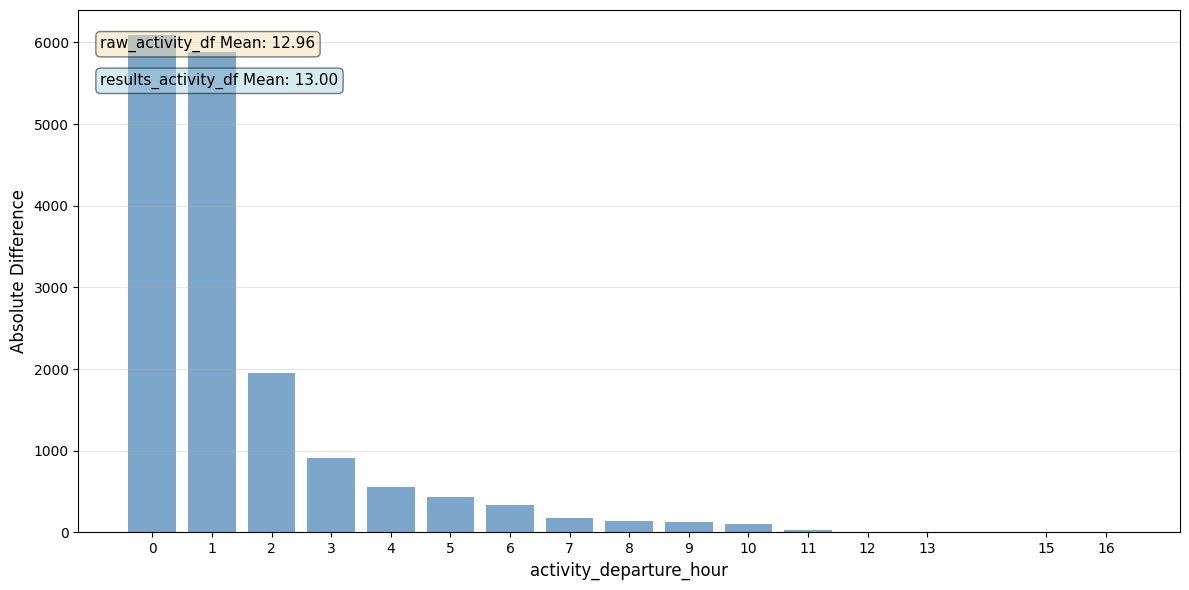

In [36]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_activity_df['activity_出发时间1小时时间段'] - results_activity_df['activity_出发时间1小时时间段'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_activity_df['activity_出发时间1小时时间段'].mean()
results_mean = results_activity_df['activity_出发时间1小时时间段'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('activity_departure_hour', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.3553723944334946


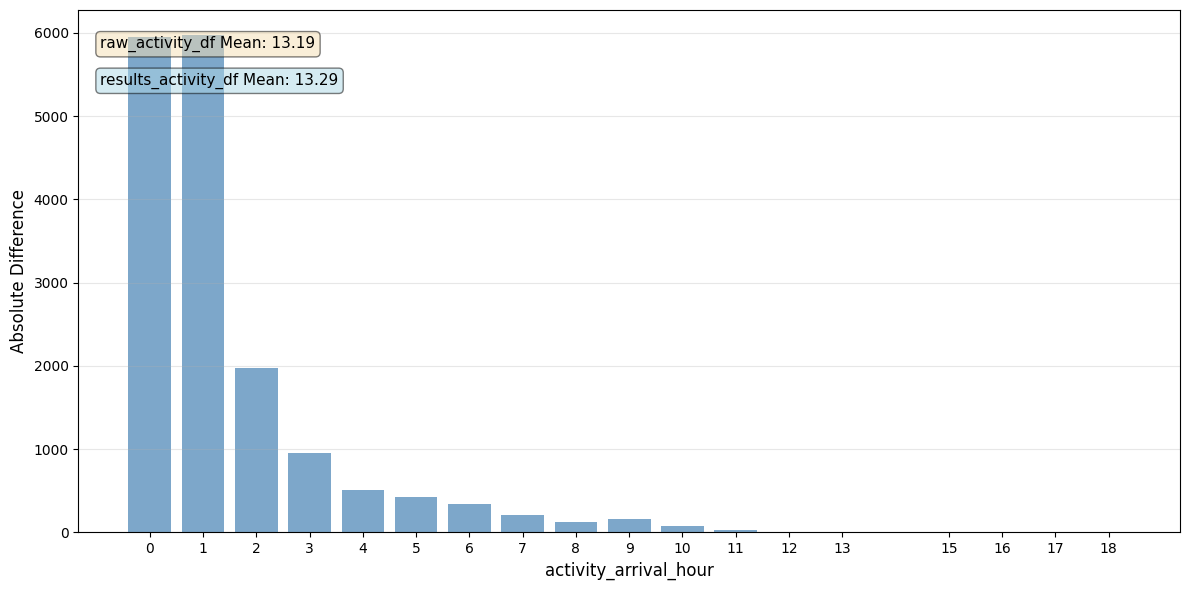

In [37]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_activity_df['activity_到达时间1小时时间段'] - results_activity_df['activity_到达时间1小时时间段'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_activity_df['activity_到达时间1小时时间段'].mean()
results_mean = results_activity_df['activity_到达时间1小时时间段'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('activity_arrival_hour', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.8052917637221525


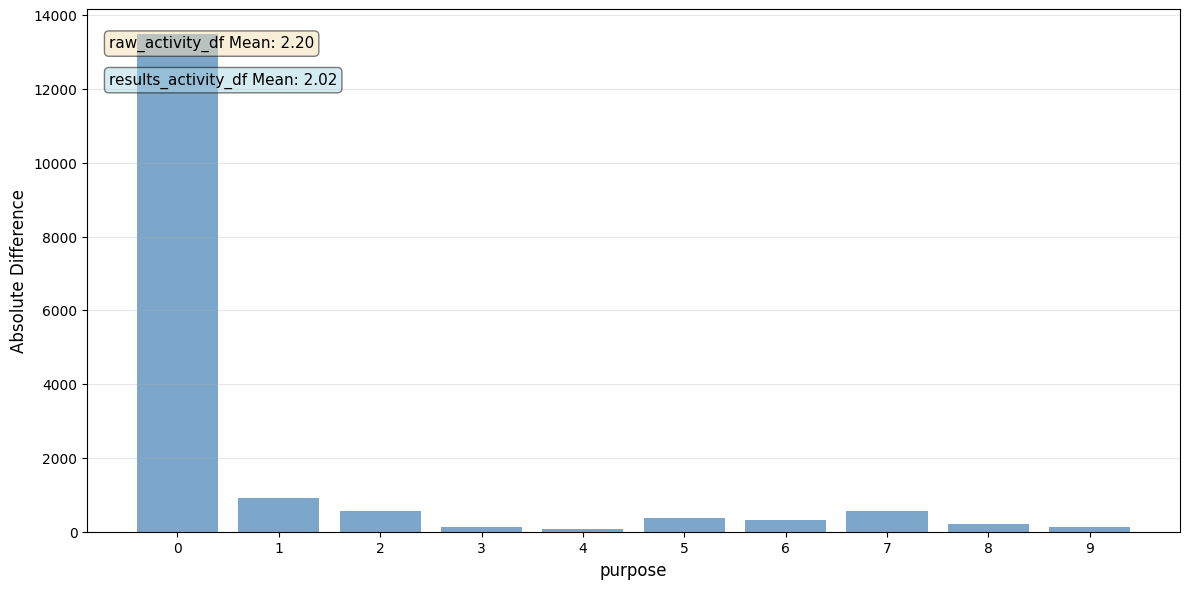

In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_activity_df['purpose'] - results_activity_df['purpose'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_activity_df['purpose'].mean()
results_mean = results_activity_df['purpose'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('purpose', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.5663262258854447


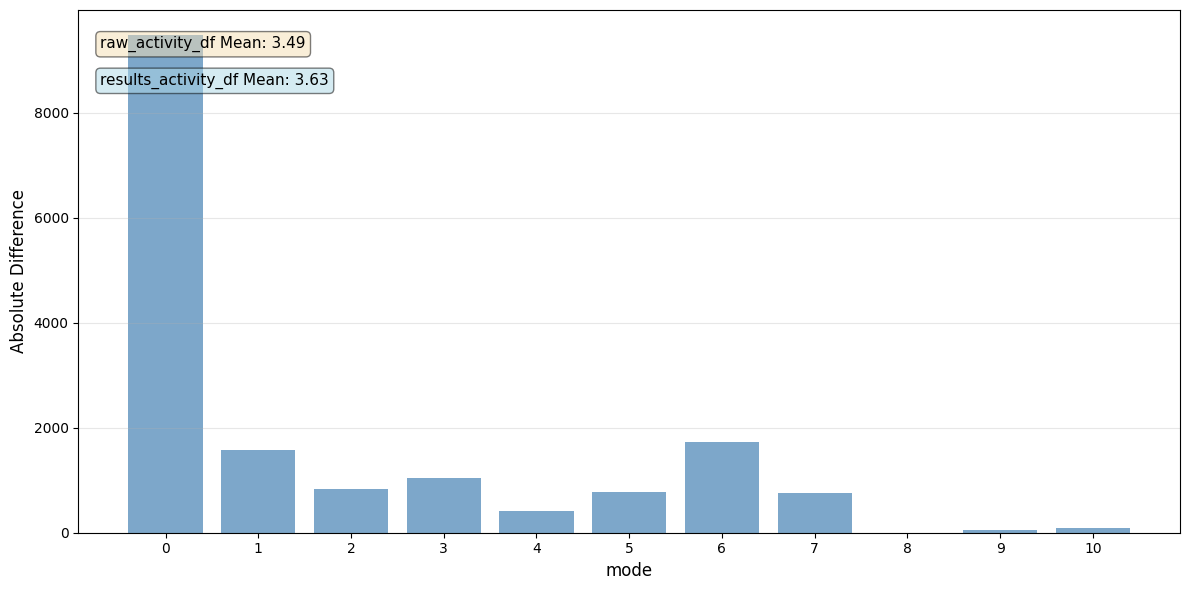

In [39]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_activity_df['mode'] - results_activity_df['mode'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_activity_df['mode'].mean()
results_mean = results_activity_df['mode'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('mode', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.8902825061219615


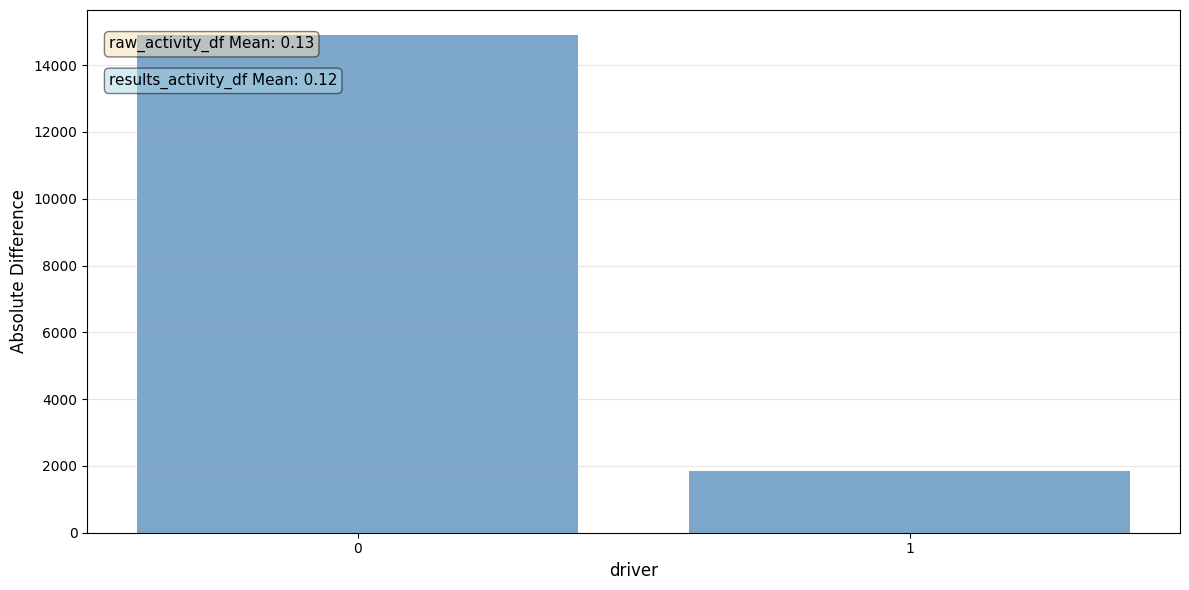

In [40]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_activity_df['driver'] - results_activity_df['driver'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_activity_df['driver'].mean()
results_mean = results_activity_df['driver'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('driver', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.9646419399151884


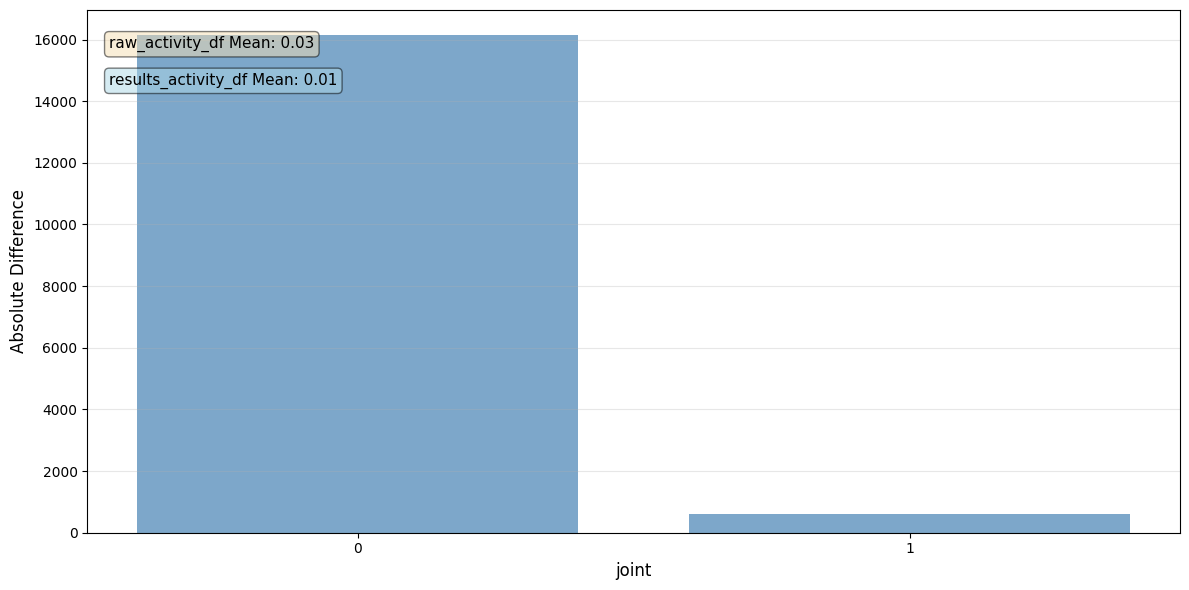

In [41]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_activity_df['joint'] - results_activity_df['joint'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_activity_df['joint'].mean()
results_mean = results_activity_df['joint'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('joint', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 精度比较2： 分布比较

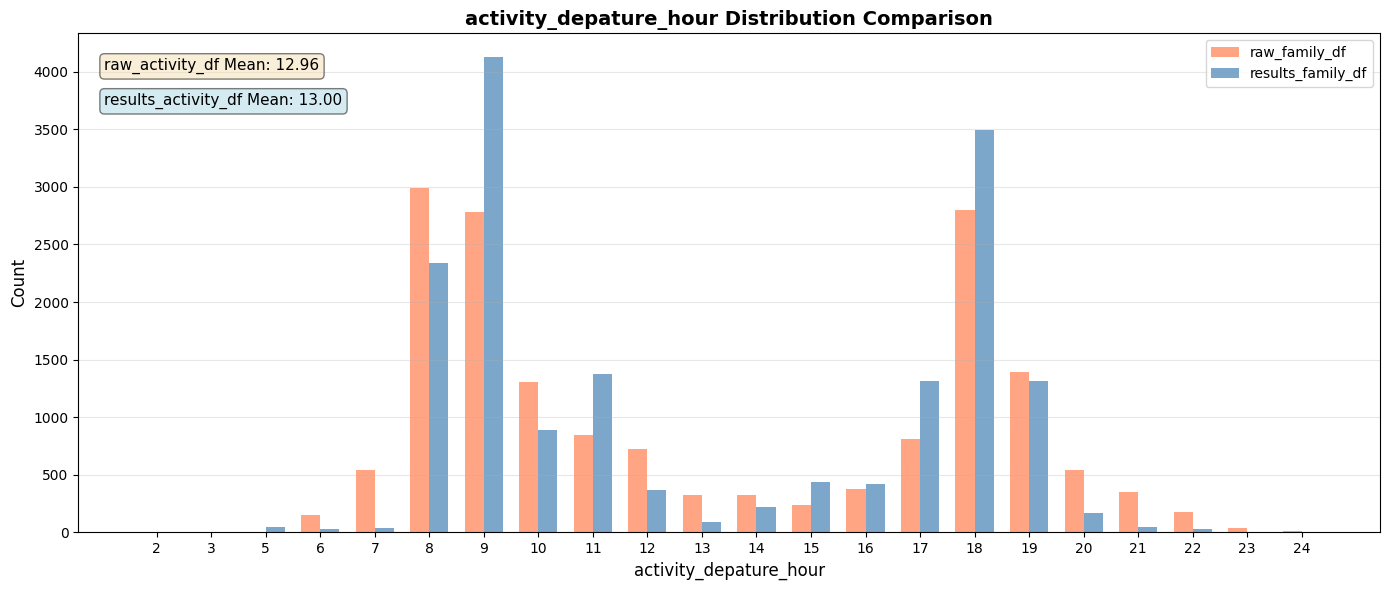

In [42]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_activity_df['activity_出发时间1小时时间段'].value_counts().sort_index()
results_age_counts = results_activity_df['activity_出发时间1小时时间段'].value_counts().sort_index()

# 计算均值
raw_mean = raw_activity_df['activity_出发时间1小时时间段'].mean()
results_mean = results_activity_df['activity_出发时间1小时时间段'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('activity_depature_hour', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('activity_depature_hour Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

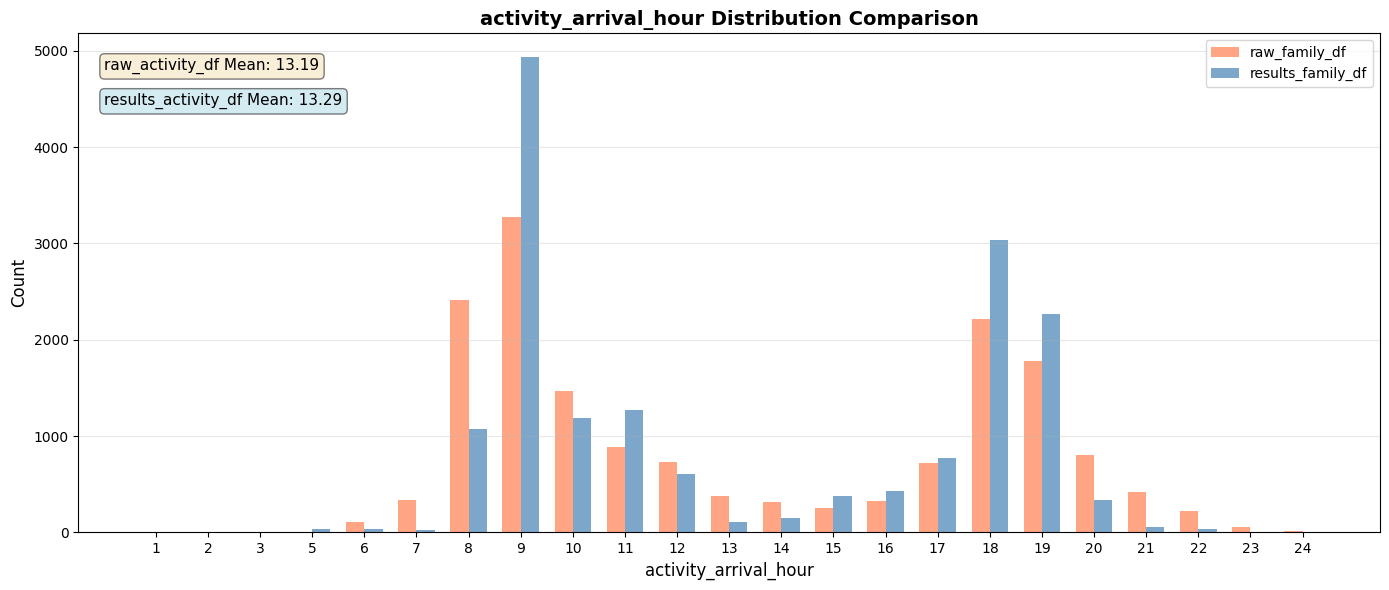

In [43]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_activity_df['activity_到达时间1小时时间段'].value_counts().sort_index()
results_age_counts = results_activity_df['activity_到达时间1小时时间段'].value_counts().sort_index()

# 计算均值
raw_mean = raw_activity_df['activity_到达时间1小时时间段'].mean()
results_mean = results_activity_df['activity_到达时间1小时时间段'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('activity_arrival_hour', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('activity_arrival_hour Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

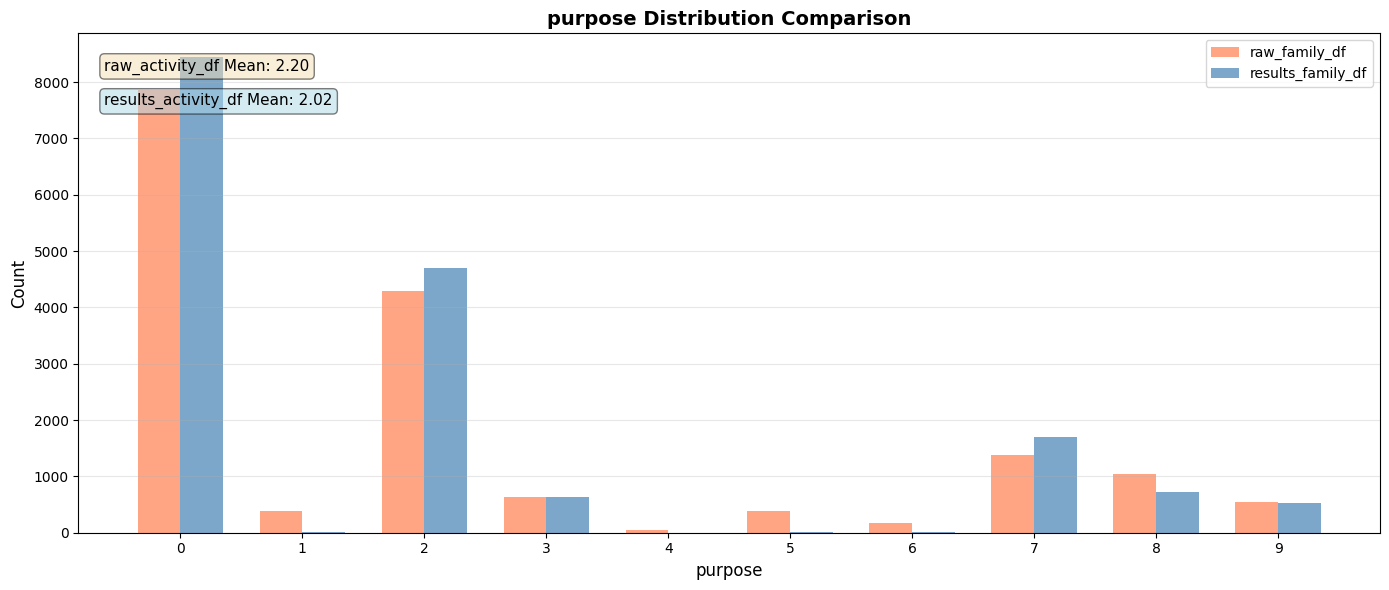

In [44]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_activity_df['purpose'].value_counts().sort_index()
results_age_counts = results_activity_df['purpose'].value_counts().sort_index()

# 计算均值
raw_mean = raw_activity_df['purpose'].mean()
results_mean = results_activity_df['purpose'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('purpose', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('purpose Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

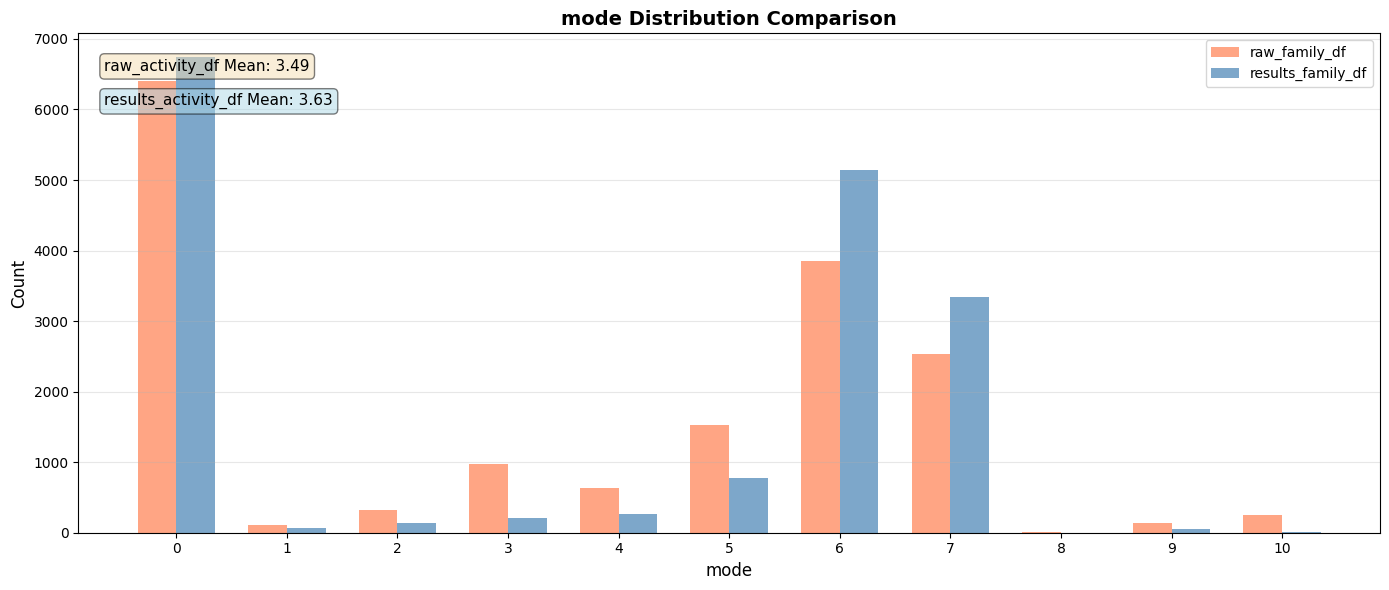

In [45]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_activity_df['mode'].value_counts().sort_index()
results_age_counts = results_activity_df['mode'].value_counts().sort_index()

# 计算均值
raw_mean = raw_activity_df['mode'].mean()
results_mean = results_activity_df['mode'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('mode', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('mode Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

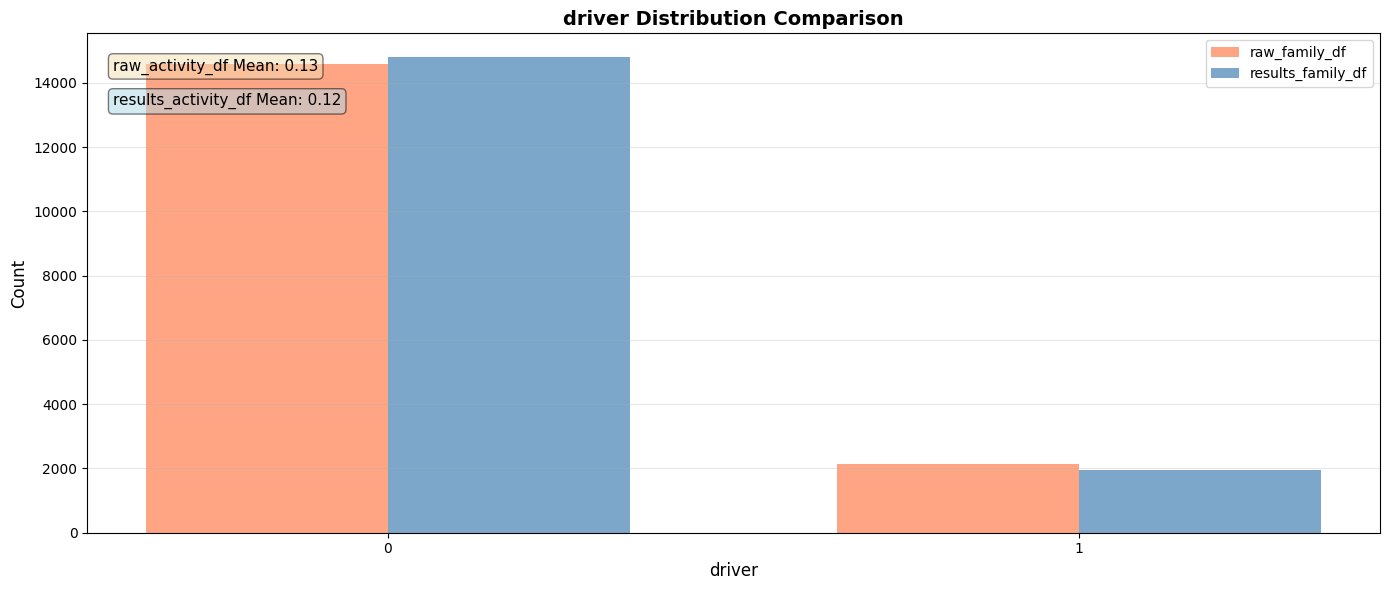

In [46]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_activity_df['driver'].value_counts().sort_index()
results_age_counts = results_activity_df['driver'].value_counts().sort_index()

# 计算均值
raw_mean = raw_activity_df['driver'].mean()
results_mean = results_activity_df['driver'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('driver', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('driver Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

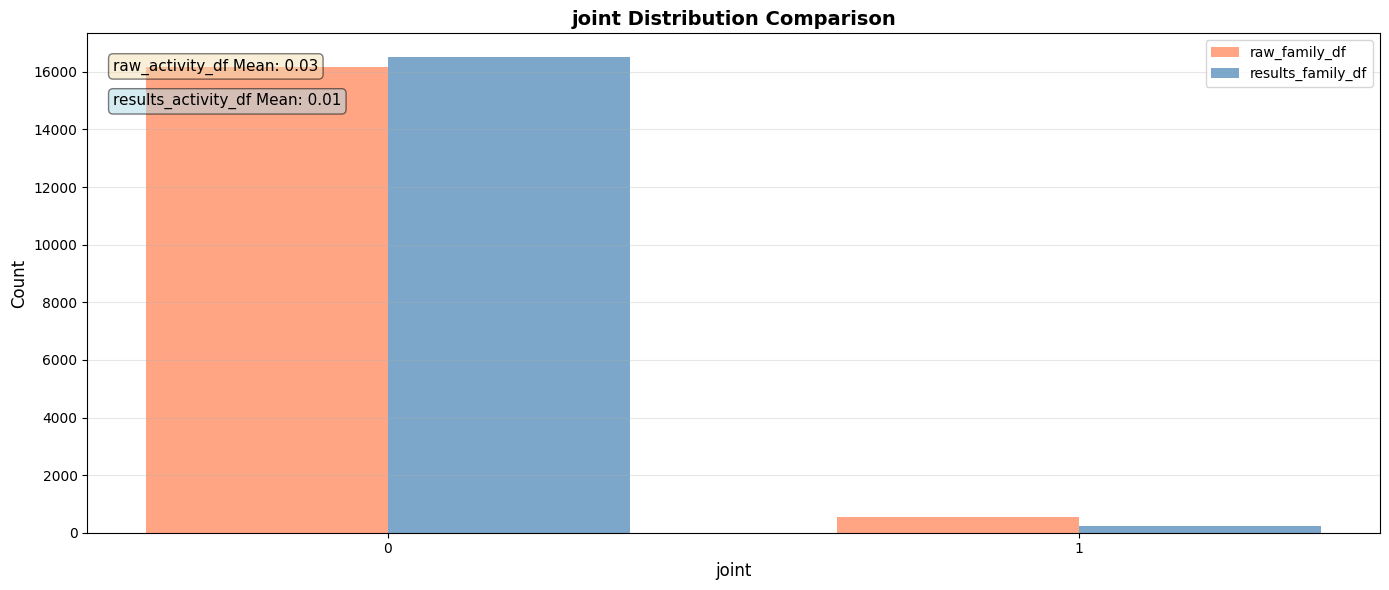

In [47]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_activity_df['joint'].value_counts().sort_index()
results_age_counts = results_activity_df['joint'].value_counts().sort_index()

# 计算均值
raw_mean = raw_activity_df['joint'].mean()
results_mean = results_activity_df['joint'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('joint', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('joint Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_activity_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_activity_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()